# Loading

In [ ]:
!pip install scanpy
!pip install anndata
!pip install sccoda
!pip install docrep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 6.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=08cc0d28cf95ff8d2d9868d976860e0515add3a732650f769d3b0567b72e0217
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=0c9148ddddd07e1f9

In [ ]:

#导入包
import anndata
print('anndata(Ver): ',anndata.__version__)
import scanpy as sc
print('scanpy(Ver): ',sc.__version__)
import matplotlib.pyplot as plt
import matplotlib
print('matplotlib(Ver): ',matplotlib.__version__)
import numpy as np
print('numpy(Ver): ',np.__version__)
import pandas as pd
print('pandas(Ver): ',pd.__version__)
import sccoda 
print('sccoda(Ver): ',sccoda.__version__)

anndata(Ver):  0.9.1
scanpy(Ver):  1.9.3
matplotlib(Ver):  3.7.1
numpy(Ver):  1.24.3
pandas(Ver):  1.3.5
sccoda(Ver):  0.1.9


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [ ]:
adata = sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_anno.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 14023 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '8': 'CD4.Reg',
    '1': 'CD4.RM',
    '9': 'CD4.RM',
    '4': 'CD4.FH',
    '3': 'CD4.Naive',
    '5': 'CD4.Naive',
    '7': 'CD8.MAIT',#(exhausted)
    '0': 'CD8.EM',
    '2': 'CD8.RM',
    '10': 'CD8.RM',
    '11': 'CD8.RM',
    '12': 'CD8.RM',
    '15': 'CD8.RM',
    '13': 'CD8.EA',
    '6': 'NK.CD56_Bright',
    '14': 'NK.CD56_Dim'
}
adata.obs['T/NK_celltype'] = adata.obs['leiden'].map(cluster2annotation).astype('category')

In [ ]:
adata_new = adata[adata.obs['T/NK_type']=='CD8']
adata_new

View of AnnData object with n_obs × n_vars = 6268 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
sc_color_Tcell=['#8A29E3',
        '#9B1A83',# 这个色卡是从张泽民课题组的论文里拔下来的
        '#C453A4',
        '#C67BAE',
        '#E68BC3',
        '#DFEAF6',
        '#9DCBE3',
        '#4292C5',
        '#0A529B',
        '#F99FB5',
        '#BC7EBC',
        '#ACD2E7',
        '#F582BD',
        '#C4DDF1', # 差异基因使用色卡 #浅色
        '#366BAF' # 差异基因使用色卡 #深色
        ]

        # 有时序的细胞亚型可以考虑颜色渐变
type_color_rna={
    'CD8.MAIT':sc_color_Tcell[0],
    'CD8.EM':sc_color_Tcell[1],
    'CD8.RM':sc_color_Tcell[2],
    'CD8.EA':sc_color_Tcell[4],
}
adata_new.uns['T/NK_celltype_colors']=adata_new.obs['T/NK_celltype'].cat.categories.map(type_color_rna).values.tolist()


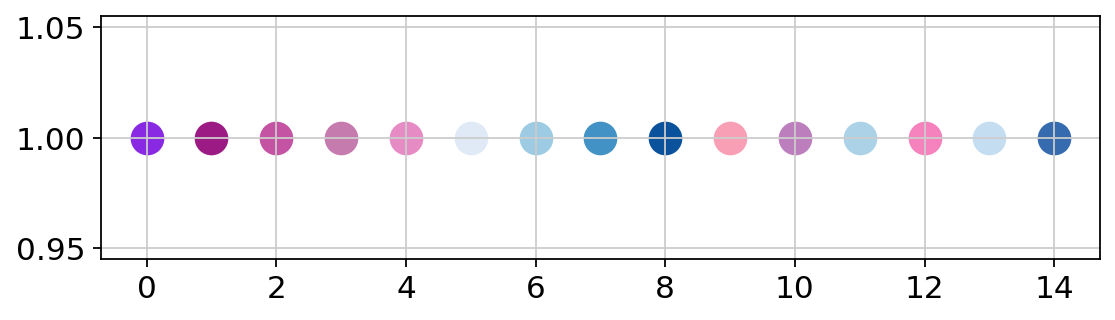

In [ ]:
plt.figure(figsize=(8, 2))
for i in range(len(sc_color_Tcell)):
    plt.scatter(i, 1, c=sc_color_Tcell[i], s=200)
plt.show()

# Figure_3A Umap图

In [97]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
sc.pp.neighbors(adata_new, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata_new)
sc.tl.paga(adata_new)
sc.pl.paga(adata_new, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_new,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


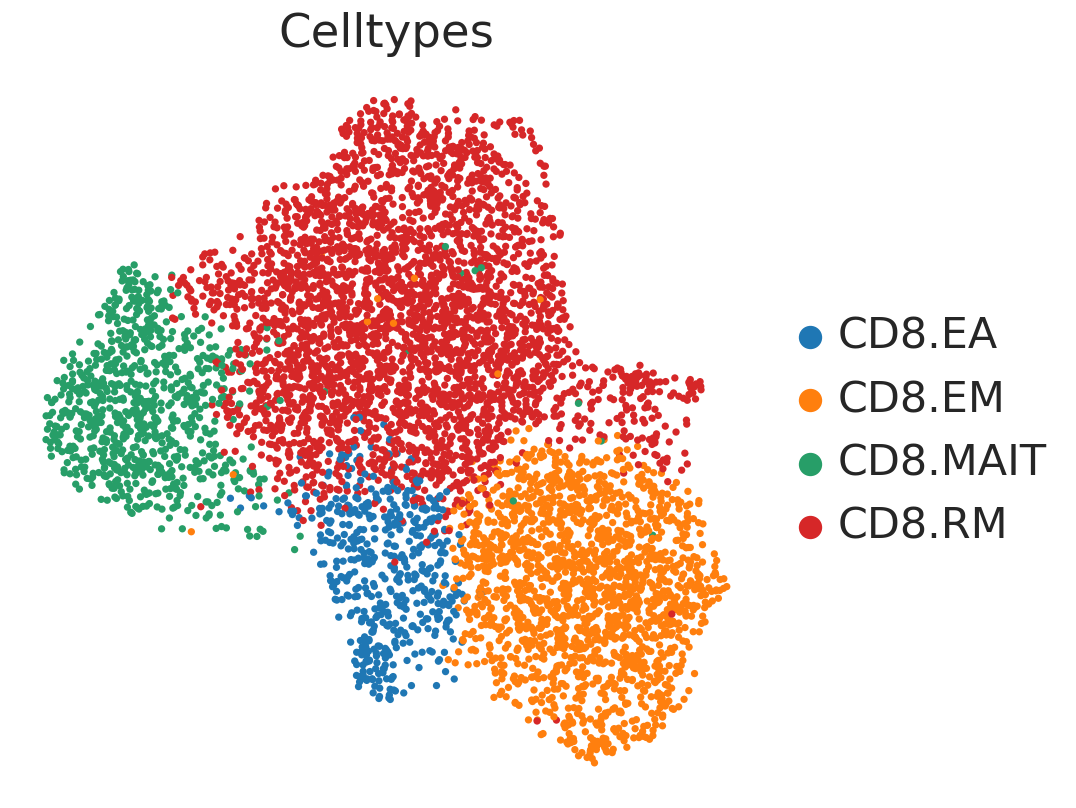

In [99]:
ax = sc.pl.embedding(
    adata_new,
    basis="X_umap",
    color='T/NK_celltype',
    title='Celltypes',
    frameon=False,
    ncols=3,
    #save='_figure1_celltype.png',
    return_fig=False,
    show=False,
)


plt.savefig("Figure3_celltype_Umap_scRNA.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_celltype_Umap_scRNA.png",dpi=300,bbox_inches = 'tight')

## 图例

In [100]:
!pip install PyComplexHeatmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
import os,sys               #与python解释器进行交互的库
import PyComplexHeatmap
from PyComplexHeatmap import *
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi']  = 120
plt.rcParams['savefig.dpi'] = 300    #设置保存的图片大小

In [102]:
adata_new

AnnData object with n_obs × n_vars = 6268 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [103]:
type_color_rna={
    'CD8.MAIT':sc_color_Tcell[0],
    'CD8.EM':sc_color_Tcell[1],
    'CD8.RM':sc_color_Tcell[2],
    'CD8.EA':sc_color_Tcell[4],
}
adata_new.uns['T/NK_celltype_colors']=adata.obs['T/NK_celltype'].cat.categories.map(type_color_rna).values.tolist()


In [104]:
adata_new.obs.loc[:,'T/NK_celltype'].unique()

['CD8.EM', 'CD8.RM', 'CD8.MAIT', 'CD8.EA']
Categories (4, object): ['CD8.EA', 'CD8.EM', 'CD8.MAIT', 'CD8.RM']

In [105]:
marker_genes_dict_var = {
    'CD8.EM':['GZMK','GZMM','CD74','GZMH'], #  CD8+细胞毒性T淋巴细胞(CTL) 等价于 CD8效应记忆细胞
    'CD8.EA':['DUSP1','FOS','FOSB','JUN'], 
    'CD8.MAIT':['KLRB1','RORA','NCR3','SLC4A10','ZBTB16'], #'SLC4A10','CCR6','DPP4','IL4I1','KLRB1','RORC','ZBTB16','KLRB1','NCR3','RORA' 
    'CD8.RM':['CAPG','ITGA1','ZNF683','XCL1','XCL2'], # )高度表达ITGA1和ZNF683，表明其组织驻留能力
  
}

In [106]:
# 计算平均基因表达量函数
def Get_average_Gene_Expression(adata,Normalized):
  # 输入adata文件，判断是否存在adata.raw
  if adata.raw == None:
    adata = adata
  else: 
    adata = adata.raw.to_adata()
    
  sc.pp.filter_genes(adata, min_cells=3)
  # 提取计算平均基因表达量
  # marker_genes_dict_var.keys()是为了指定细胞类型顺序
  Gene_Expression = pd.DataFrame(index = adata.var.index)
  for i in adata.obs['T/NK_celltype'].cat.categories:
    adata_new = adata[adata.obs['T/NK_celltype']==i]
    Gene_Expression.loc[:,i] = np.average(adata_new.X.todense().A,axis=0)

  # 转置
  Gene_Expression = Gene_Expression

  # 是否标准化
  if Normalized == True:
    Gene_Expression = (Gene_Expression-Gene_Expression.min())/ (Gene_Expression.max()-Gene_Expression.min())
    Gene_Expression = Gene_Expression.dropna(axis=1, how='all')
  
  return Gene_Expression

In [107]:
# 得到基因表达谱
Gene_Expression = Get_average_Gene_Expression(adata_new,Normalized=True)
Gene_Expression = Gene_Expression[marker_genes_dict_var]
Gene_Expression

filtered out 13295 genes that are detected in less than 3 cells


CD8.EM    CD8.EA  CD8.MAIT    CD8.RM
A1BG      0.025093  0.017306  0.030299  0.041493
A1BG-AS1  0.007134  0.003641  0.011797  0.009978
A1CF      0.000153  0.000760  0.000247  0.000438
A2M       0.004864  0.001772  0.003738  0.001045
A2M-AS1   0.008963  0.003622  0.006666  0.000919
...            ...       ...       ...       ...
ZXDC      0.028258  0.024184  0.029804  0.030399
ZYG11A    0.000218  0.000909  0.000000  0.000074
ZYG11B    0.006500  0.003681  0.006862  0.006156
ZYX       0.116315  0.092096  0.131848  0.183637
ZZEF1     0.052313  0.039129  0.070133  0.053991

[19264 rows x 4 columns]

In [108]:
# 获得var（纵轴annotation）
def Get_Celltype_of_MarkerGene(Gene_Expression,groupby):
  var = pd.DataFrame(index = Gene_Expression.columns, columns = groupby)
  for i in marker_genes_dict_var.keys():
    print('Now we get '+str(i))
    gene = marker_genes_dict_var.get(i)
    for j in gene:
      var.loc[j,:] = i
  return var #提取marker基因

var = Get_Celltype_of_MarkerGene(Gene_Expression,['celltype'])
var.dropna(inplace=True)
var

Now we get CD8.EM
Now we get CD8.EA
Now we get CD8.MAIT
Now we get CD8.RM


celltype
GZMK       CD8.EM
GZMM       CD8.EM
CD74       CD8.EM
GZMH       CD8.EM
DUSP1      CD8.EA
FOS        CD8.EA
FOSB       CD8.EA
JUN        CD8.EA
KLRB1    CD8.MAIT
RORA     CD8.MAIT
NCR3     CD8.MAIT
SLC4A10  CD8.MAIT
ZBTB16   CD8.MAIT
CAPG       CD8.RM
ITGA1      CD8.RM
ZNF683     CD8.RM
XCL1       CD8.RM
XCL2       CD8.RM

In [109]:
print(PyComplexHeatmap.__path__)  

['/usr/local/lib/python3.10/dist-packages/PyComplexHeatmap']


Starting plotting HeatmapAnnotations


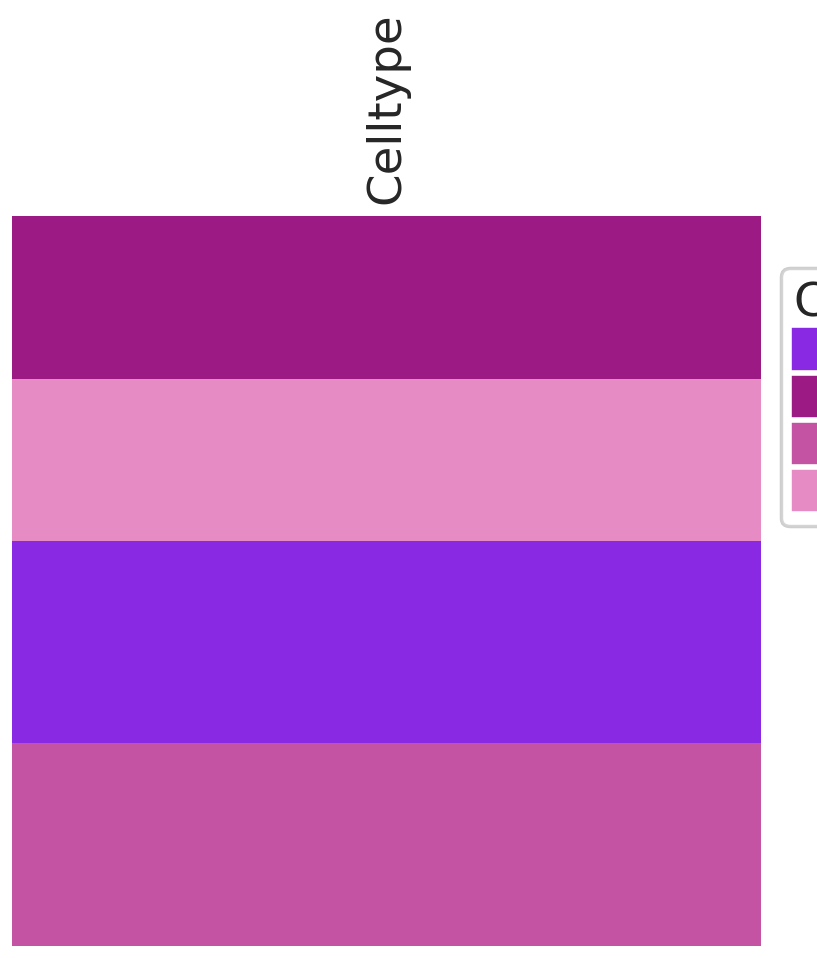

In [110]:
index_ha = HeatmapAnnotation(Celltype=anno_simple(var.loc[:,'celltype'], 
                colors=type_color_rna, add_text=False, legend=True, height=5),axis=0, # 绘制T/NK_type注释
               plot=True,legend=False,legend_gap=3,legend_hpad=0,legend_width=3
                           )

No ax was provided, using plt.gca()


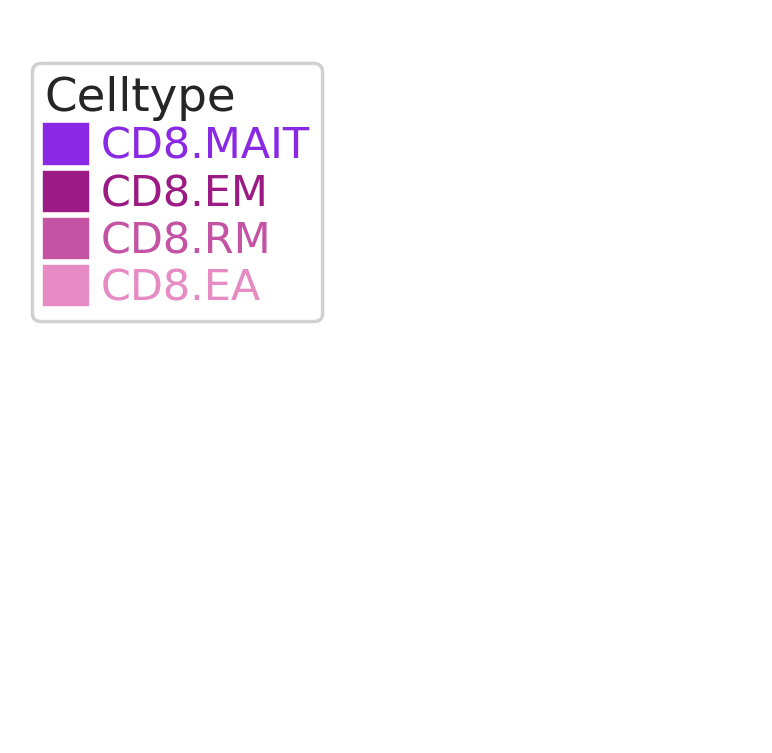

In [111]:
# 绘制没画出来的图例
plt.figure()
index_ha.plot_legends()
plt.savefig("Figure3_celltype_legend.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_celltype_legend.png",dpi=300,bbox_inches = 'tight')
plt.show()

# Figure_3B_C_D 伪时序，命运谱系

In [112]:
!pip uninstall pyVIA
!pip uninstall numpy
!pip install numpy==1.22
!pip install pyVIA  

Found existing installation: pyVIA 0.1.82
Uninstalling pyVIA-0.1.82:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pyVIA-0.1.82.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pyVIA/*
Proceed (Y/n)? Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 680, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 375, in remove
    if auto_confirm or self._allowed_to_proceed(verbose):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 415, in _allowed_to_proceed
    return ask(

In [113]:
from pyVIA.core import *
import pyVIA.datasets_via as datasets_via
#from core_working_ import *
import pandas as pd
import umap
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [119]:
tsnem = adata_new.obsm['X_umap']
# 细胞类型标签
true_label = adata_new.obs['T/NK_celltype'].tolist()
# Umap标签
embedding = adata_new.obsm['X_umap']

#define parameters
ncomps, knn, random_seed, dataset, root_user  =30,20, 0,'T/NK_celltype', ['CD8.EA']

v0 = VIA(adata_new.obsm['X_scVI'][:, 0:ncomps], 
         true_label,   # 细胞类型标签
         jac_std_global=0.5, #控制集群的细粒度。范围0-1是合理的。值接近0将导致更多且更小的集群
         dist_std_local=1, 
         knn=knn,  # 图的最近邻的已知数
         cluster_graph_pruning_std=0.2, 
         too_big_factor=0.3, # 超过整个细胞群体30%的亚群将被重新聚类。值0.1-0.3运行良好
         root_user=root_user, # 起始细胞
         preserve_disconnected=True, # 尝试链接起由于剪枝带来的碎片，如果轨迹存在断裂情况，设置为Fasle
         dataset='group', # Group ID，会基于提供的 root_user 参数的类型进行设置
         random_seed=random_seed,#
         edgebundle_pruning_twice=True, # 设置为True，表明进一步的视觉修剪
         
         )#, piegraph_arrow_head_width=0.2,             piegraph_edgeweight_scalingfactor=1.0)  
v0.run_VIA()

2023-05-16 11:59:19.680630	Running VIA over input data of 6268 (samples) x 10 (features)
2023-05-16 11:59:19.681970	Knngraph has 20 neighbors
2023-05-16 11:59:24.361367	Finished global pruning of 20-knn graph used for clustering at level of 0.5. Kept 64.0 % of edges. 
2023-05-16 11:59:24.399348	Number of connected components used for clustergraph  is 1
2023-05-16 11:59:24.641611	Commencing community detection
2023-05-16 11:59:24.821855	Finished running Leiden algorithm. Found 19 clusters.
2023-05-16 11:59:24.824326	Merging 0 very small clusters (<10)
2023-05-16 11:59:24.826656	Finished detecting communities. Found 19 communities
2023-05-16 11:59:24.827317	Making cluster graph. Global cluster graph pruning level: 0.2
2023-05-16 11:59:24.848872	Graph has 1 connected components before pruning
2023-05-16 11:59:24.852409	Graph has 1 connected components after pruning
2023-05-16 11:59:24.853227	Graph has 1 connected components after reconnecting
2023-05-16 11:59:24.854323	0.0% links trimmed 

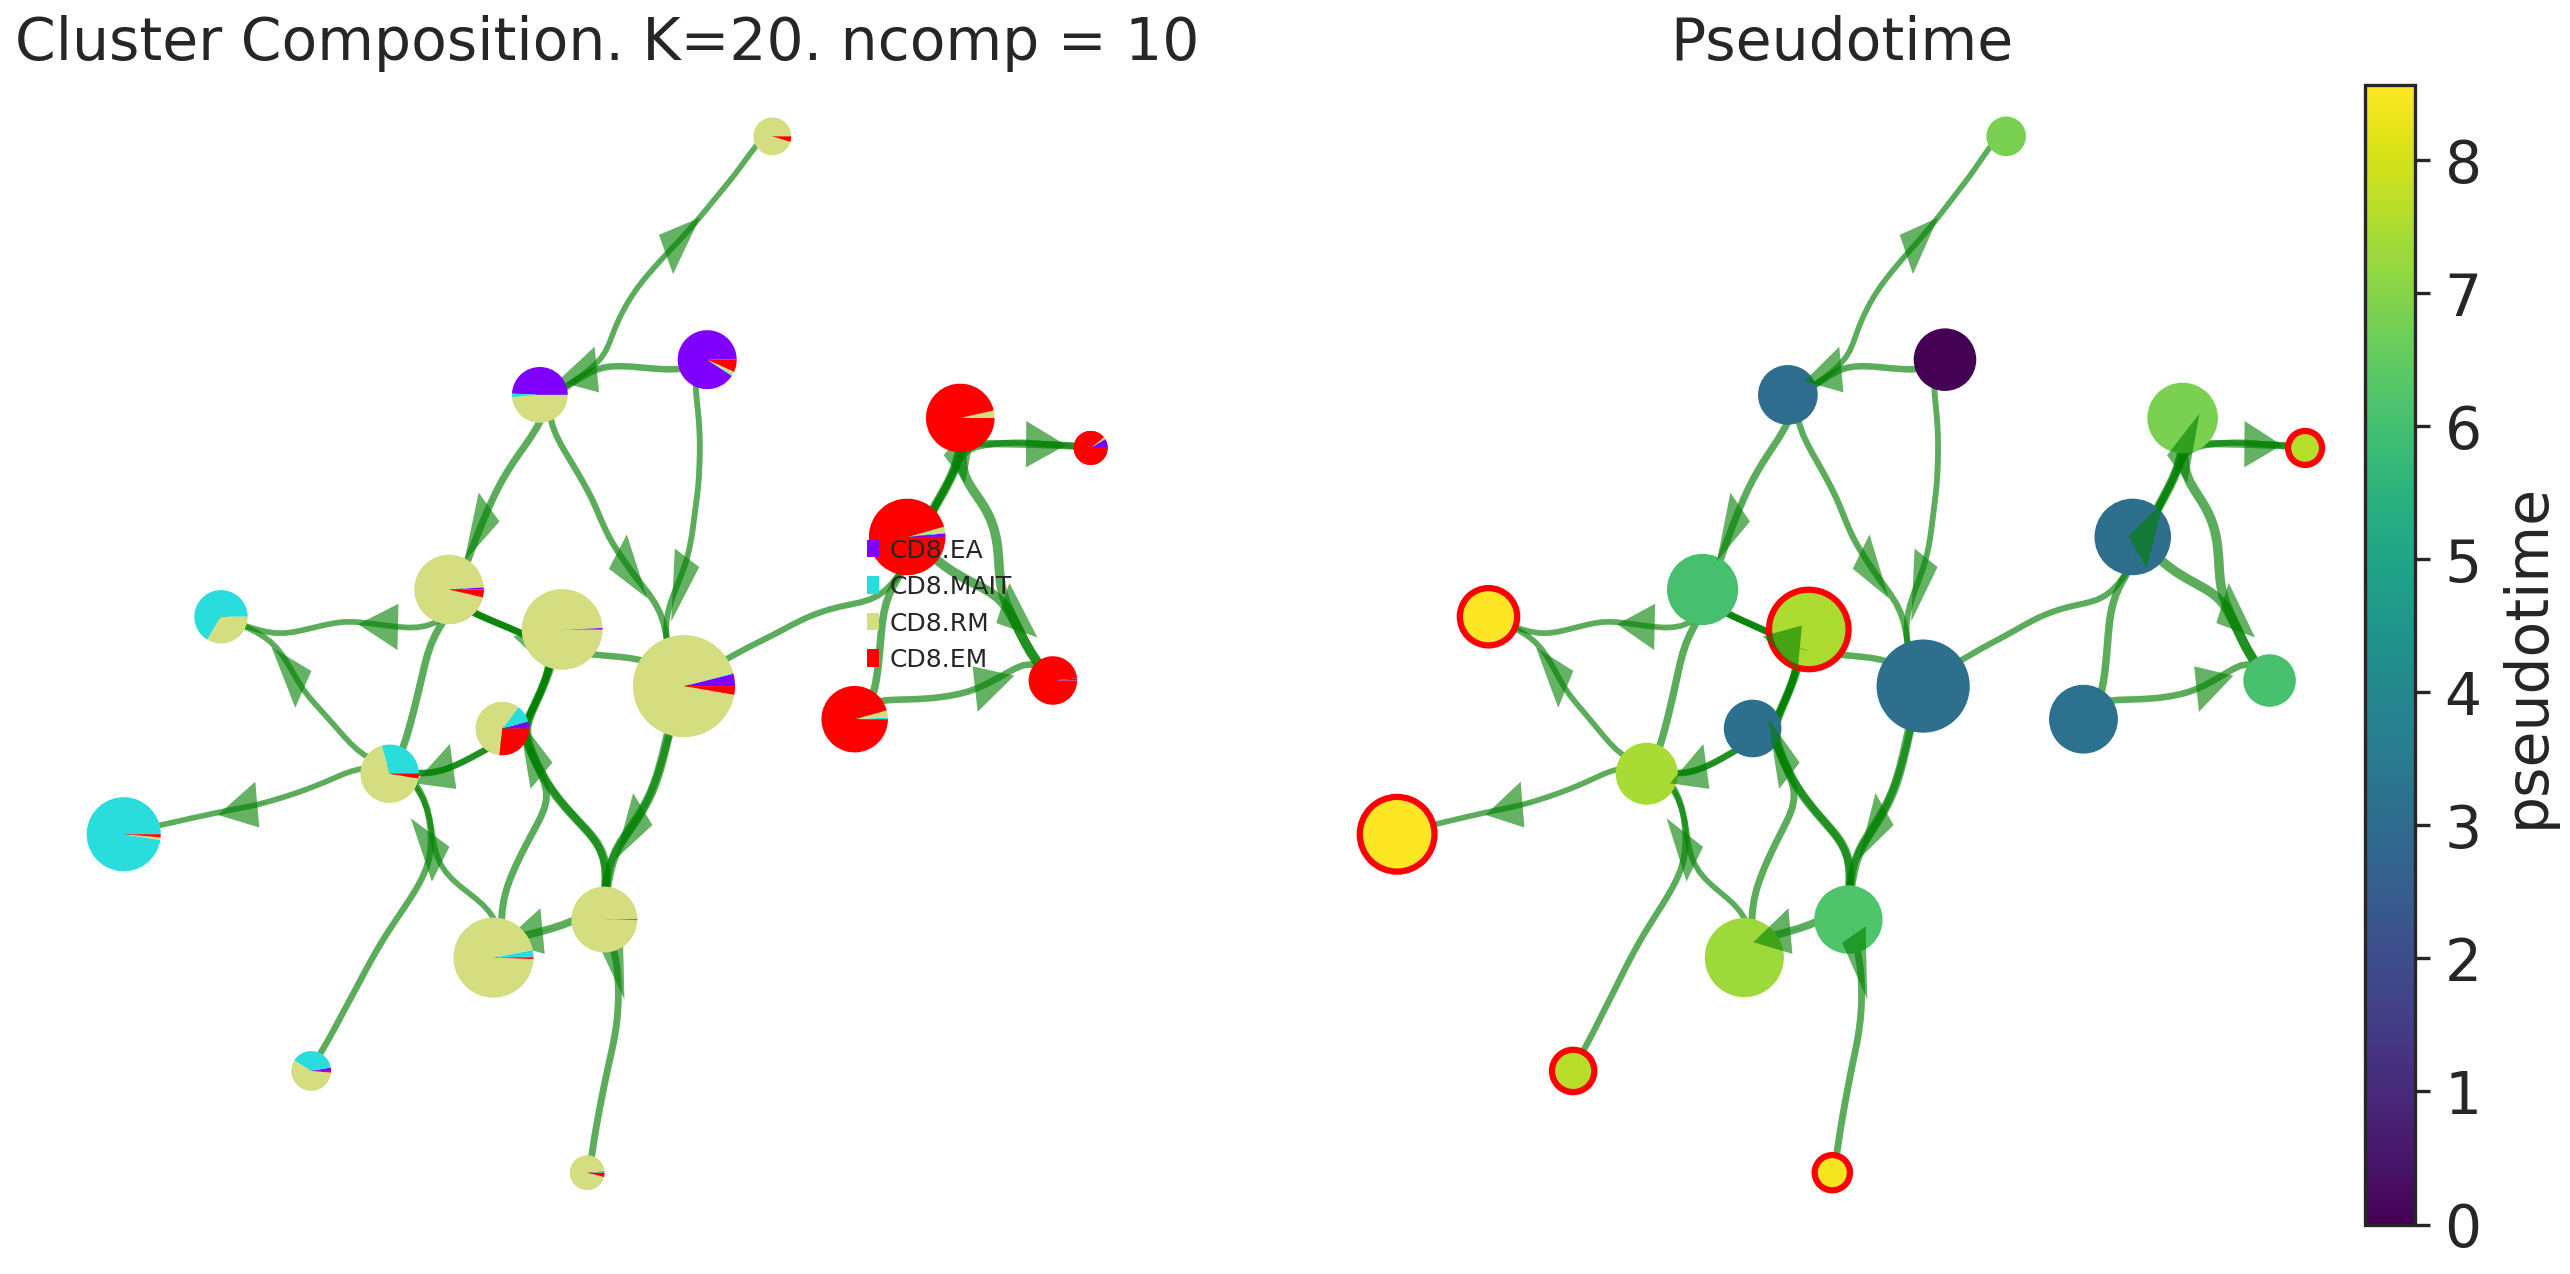

In [138]:
# VIA graph 
# 细胞组成图和伪时序图

fig, ax, ax2= draw_piechart_graph(v0, 
                  type_data='pt', # 可选择‘pt'(可视化伪时序). or ‘gene’
                  title='', #
                  cmap='viridis', # 颜色
                  ax_text=False, # 如果不需要细胞类型标签可以选择False(别选True，太辣眼睛了)
                  gene_exp='', # 如果需要绘制基因强度，可以在输入基因名
                  alpha_edge=0.4,  # 不知道有啥用
                  linewidth_edge=1.5,  # 设置线的宽度
                  edge_color='green',  # 设置线的颜色 
                  headwidth_arrow=0.08, # 设置箭头大小
                  )
fig.set_size_inches(10,5)
plt.savefig("Figure3_VIA.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_VIA.png",dpi=300,bbox_inches = 'tight')

In [142]:
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
ax.figure.savefig('Figure3_Composition.png',dpi=300, bbox_inches=extent)
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_Composition.png",dpi=300,bbox_inches = 'tight')

<Figure size 480x480 with 0 Axes>

In [141]:
extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
ax2.figure.savefig('Figure3_Trajectory.png',dpi=300, bbox_inches=extent)
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_Trajectory.png",dpi=300,bbox_inches = 'tight')

<Figure size 480x480 with 0 Axes>

In [143]:
# 别想了，从packages里扒下来的


def via_streamplot(via_coarse, embedding:ndarray=None , density_grid:float=0.5, arrow_size:float=0.7, arrow_color:str = 'k',
arrow_style="-|>",  max_length:int=4, linewidth:float=1,min_mass = 1, cutoff_perc:int = 5,scatter_size:int=500, scatter_alpha:float=0.5,marker_edgewidth:float=0.1, density_stream:int = 2, smooth_transition:int=1, smooth_grid:float=0.5, color_scheme:str = 'annotation', add_outline_clusters:bool=False, cluster_outline_edgewidth = 0.001,gp_color = 'white', bg_color='black' , dpi=300 , title='Streamplot', b_bias=20, n_neighbors_velocity_grid=None, other_labels:list = None,use_sequentially_augmented=False, cmap_str:str='rainbow'):
    '''
    Construct vector streamplot on the embedding to show a fine-grained view of inferred directions in the trajectory

    :param via_coarse:
    :param embedding:  np.ndarray of shape (n_samples, 2) umap or other 2-d embedding on which to project the directionality of cells
    :param density_grid:
    :param arrow_size:
    :param arrow_color:
    :param arrow_style:
    :param max_length:
    :param linewidth:  width of  lines in streamplot, default = 1
    :param min_mass:
    :param cutoff_perc:
    :param scatter_size: size of scatter points default =500
    :param scatter_alpha: transpsarency of scatter points
    :param marker_edgewidth: width of outline arround each scatter point, default = 0.1
    :param density_stream:
    :param smooth_transition:
    :param smooth_grid:
    :param color_scheme: str, default = 'annotation' corresponds to self.true_labels. Other options are 'time' (uses single-cell pseudotime) and 'cluster' (via cluster graph) and 'other'
    :param add_outline_clusters:
    :param cluster_outline_edgewidth:
    :param gp_color:
    :param bg_color:
    :param dpi:
    :param title:
    :param b_bias: default = 20. higher value makes the forward bias of pseudotime stronger
    :param n_neighbors_velocity_grid:
    :param other_labels: list (will be used for the color scheme)
    :param use_sequentially_augmented:
    :param cmap_str:
    :return: fig, ax
    '''
    """
    
   
  
   Parameters
   ----------
   X_emb:

   scatter_size: int, default = 500

   linewidth:

   marker_edgewidth: 

   streamplot matplotlib.pyplot instance of fine-grained trajectories drawn on top of scatter plot
   """

    import matplotlib.patheffects as PathEffects
    if embedding is None:
        embedding = via_coarse.embedding
        if embedding is None:
            print(f'{datetime.now()}\tWARNING: please assign ambedding attribute to via_coarse as v0.embedding = ndarray of [n_cells x 2]')

    V_emb = via_coarse._velocity_embedding(embedding, smooth_transition,b=b_bias, use_sequentially_augmented=use_sequentially_augmented)

    V_emb *=20 #5


    X_grid, V_grid = compute_velocity_on_grid(
        X_emb=embedding,
        V_emb=V_emb,
        density=density_grid,
        smooth=smooth_grid,
        min_mass=min_mass,
        autoscale=False,
        adjust_for_stream=True,
        cutoff_perc=cutoff_perc, n_neighbors=n_neighbors_velocity_grid )

    # adapted from : https://github.com/theislab/scvelo/blob/1805ab4a72d3f34496f0ef246500a159f619d3a2/scvelo/plotting/velocity_embedding_grid.py#L27
    lengths = np.sqrt((V_grid ** 2).sum(0))

    linewidth = 1 if linewidth is None else linewidth
    #linewidth *= 2 * lengths / np.percentile(lengths[~np.isnan(lengths)],90)
    linewidth *= 2 * lengths / lengths[~np.isnan(lengths)].max()

    #linewidth=0.5
    fig, ax = plt.subplots(dpi=dpi)
    ax.grid(False)
    ax.streamplot(X_grid[0], X_grid[1], V_grid[0], V_grid[1], color=arrow_color, arrowsize=arrow_size, arrowstyle=arrow_style, zorder = 3, linewidth=linewidth, density = density_stream, maxlength=max_length)

    #num_cluster = len(set(super_cluster_labels))

    if add_outline_clusters:
        # add black outline to outer cells and a white inner rim
        #adapted from scanpy (scVelo utils adapts this from scanpy)
        gp_size = (2 * (scatter_size * cluster_outline_edgewidth *.1) + 0.1*scatter_size) ** 2

        bg_size = (2 * (scatter_size * cluster_outline_edgewidth)+ math.sqrt(gp_size)) ** 2

        ax.scatter(embedding[:, 0],embedding[:, 1], s=bg_size, marker=".", c=bg_color, zorder=-2)
        ax.scatter(embedding[:, 0], embedding[:, 1], s=gp_size, marker=".", c=gp_color, zorder=-1)

    if color_scheme == 'time':
        ax.scatter(embedding[:,0],embedding[:,1], c=via_coarse.single_cell_pt_markov,alpha=scatter_alpha,  
                   zorder = 0, s=scatter_size, linewidths=marker_edgewidth, cmap = 'viridis') # 颜色选择
    else:
        if color_scheme == 'annotation':color_labels = via_coarse.true_label
        if color_scheme == 'cluster': color_labels= via_coarse.labels
        if other_labels is not None: color_labels = other_labels

        cmap_ = plt.get_cmap(cmap_str)
        #plt.cm.rainbow(color)

        line = np.linspace(0, 1, len(set(color_labels)))
        for color, group in zip(line, sorted(set(color_labels))):
            where = np.where(np.array(color_labels) == group)[0]
            ax.scatter(embedding[where, 0], embedding[where, 1], label=group,
                        c=np.asarray(cmap_(color)).reshape(-1, 4),
                        alpha=scatter_alpha,  zorder = 0, s=scatter_size, linewidths=marker_edgewidth)

            x_mean = embedding[where, 0].mean()
            y_mean = embedding[where, 1].mean()
            ax.text(x_mean, y_mean, str(group), fontsize=5, zorder=4, path_effects = [PathEffects.withStroke(linewidth=1, foreground='w')], weight = 'bold')

    fig.patch.set_visible(False)
    ax.axis('off')
    ax.set_title(title)
    return fig, ax


In [124]:
fig, ax = via_streamplot(v0,
        embedding,
        scatter_size = 50, # 散点大小
        scatter_alpha = 0.5,  # 散点深浅调整
        marker_edgewidth = 0.1, # 散点轮廓
        density_stream = 2,  # 场线间距
        smooth_transition = 1, # 概率转移矩阵平滑参数
        color_scheme = 'time', # 设置为time则显示伪时序
        add_outline_clusters = False, # 不知道有啥用
        )
fig.set_size_inches(4,4)
plt.savefig("Figure3_streamplot.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_streamplot.png",dpi=300,bbox_inches = 'tight')

Output hidden; open in https://colab.research.google.com to view.

In [125]:
draw_trajectory_gams

<function pyVIA.plotting_via.draw_trajectory_gams(via_object, via_fine=None, embedding: numpy.ndarray = None, idx: Optional[list] = None, title_str: str = 'Pseudotime', draw_all_curves: bool = True, arrow_width_scale_factor: float = 15.0, scatter_size: float = 50, scatter_alpha: float = 0.5, linewidth: float = 1.5, marker_edgewidth: float = 1, cmap_pseudotime: str = 'viridis_r', dpi: int = 150, highlight_terminal_states: bool = True, use_maxout_edgelist: bool = False)>

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


2023-05-16 11:59:53.900581	Super cluster 1 is a super terminal with sub_terminal cluster 1
2023-05-16 11:59:53.901909	Super cluster 4 is a super terminal with sub_terminal cluster 4
2023-05-16 11:59:53.902661	Super cluster 13 is a super terminal with sub_terminal cluster 13
2023-05-16 11:59:53.903404	Super cluster 15 is a super terminal with sub_terminal cluster 15
2023-05-16 11:59:53.904137	Super cluster 17 is a super terminal with sub_terminal cluster 17
2023-05-16 11:59:53.904882	Super cluster 18 is a super terminal with sub_terminal cluster 18


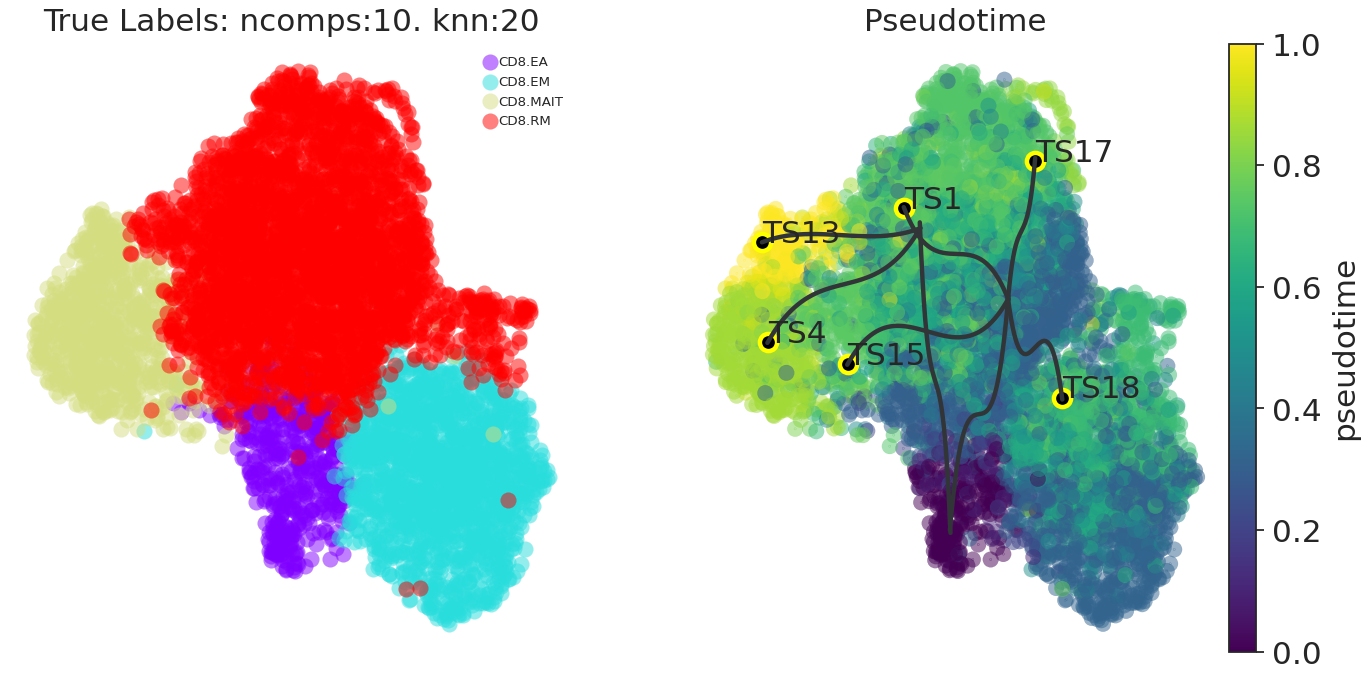

In [126]:
fig, ax, ax1 = draw_trajectory_gams(via_object=v0,     # 不要想太多，这个和下面参数都是v0
                    via_fine= v0,
                    embedding=embedding,  # 可视化二维坐标
                    draw_all_curves=False, # 如果聚类图有太多的边，无法以可视化的方式进行投影，那么将其设置为 False，以获得图形路径的简化视图
                    dpi=80,
                    cmap_pseudotime ='viridis',
                    arrow_width_scale_factor = 15, # 箭头宽度比例因子
                    linewidth = 2, # 线宽
                    highlight_terminal_states =True
                    )
fig.set_size_inches(10,5)
plt.savefig("Figure3_trajectory_gams.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_trajectory_gams.png",dpi=300,bbox_inches = 'tight')

In [127]:
extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
ax1.figure.savefig('Figure3_graph.png',dpi=300, bbox_inches=extent)
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_graph.png",dpi=300,bbox_inches = 'tight')

<Figure size 480x480 with 0 Axes>

# Figure_3E MAIT谱系

In [128]:
!pip install colormap
!pip install easydev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
# 设置色卡
sc_color_Gene=['#FAFCCF', #浅色
        '#49B8C2', #中间
        '#0C2064', # 深色
        ]
        # 有时序的细胞亚型可以考虑颜色渐变
        

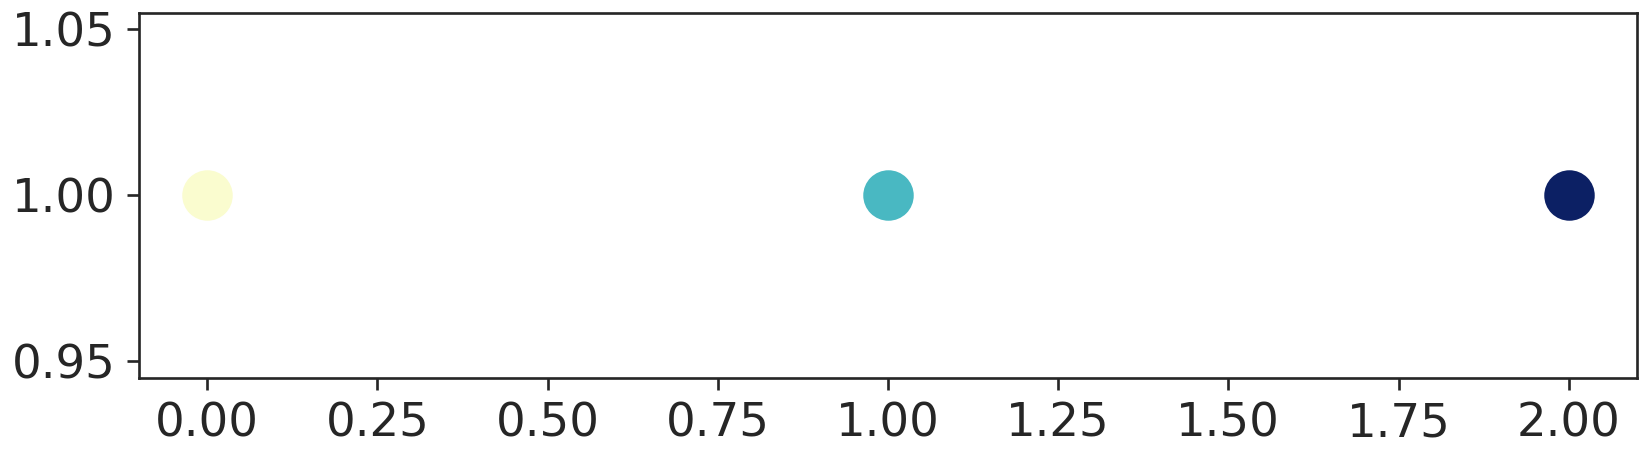

In [130]:
# 可视化色卡
plt.figure(figsize=(8, 2))
for i in range(len(sc_color_Gene)):
    plt.scatter(i, 1, c=sc_color_Gene[i], s=200)
plt.show()

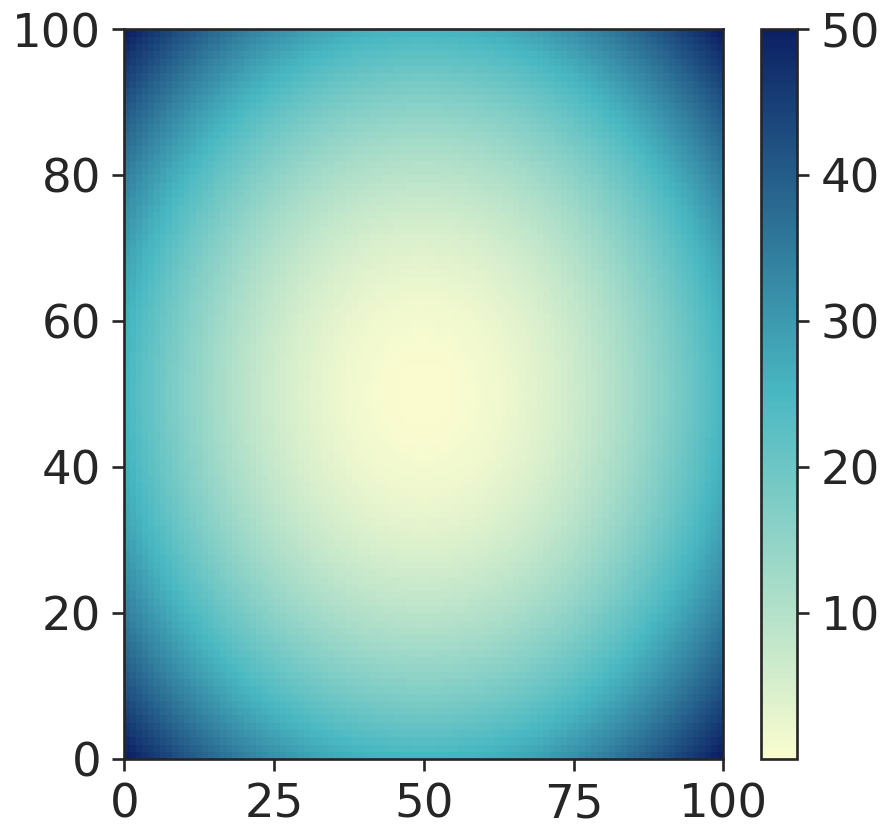

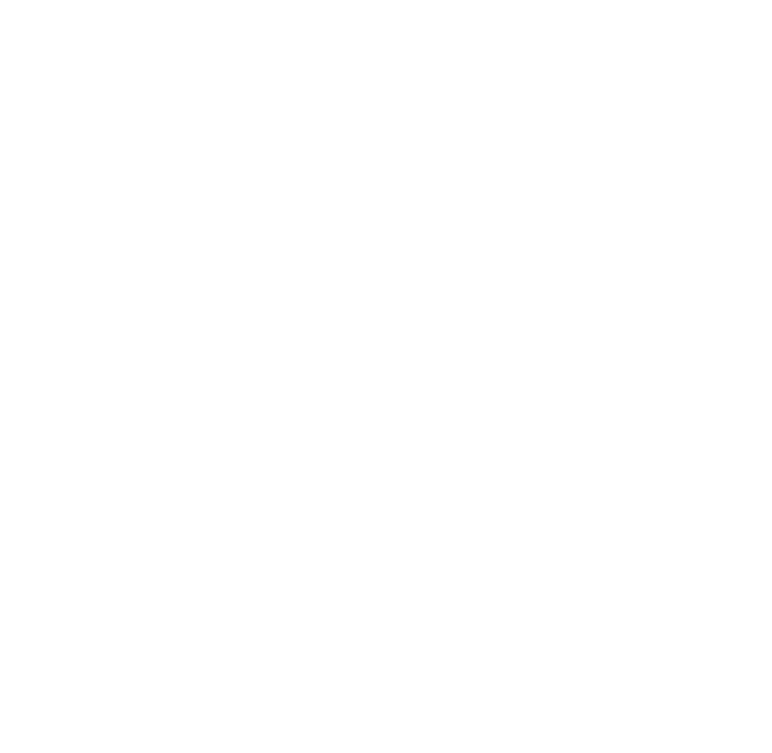

In [131]:
from colormap import Colormap
c = Colormap()
genecmap = c.cmap_linear(sc_color_Gene[0],sc_color_Gene[1],sc_color_Gene[2],)
c.test_colormap(genecmap)

2023-05-16 12:00:09.414526	Marker_lineages: [4, 13]
2023-05-16 12:00:09.418709	The number of components in the original full graph is 1
2023-05-16 12:00:09.418798	For downstream visualization purposes we are also constructing a low knn-graph 
2023-05-16 12:00:14.109108	Check sc pb 1.0 
2023-05-16 12:00:14.295844	Cluster path on clustergraph starting from Root Cluster 9 to Terminal Cluster 1: [9, 0, 8, 1]
2023-05-16 12:00:14.295987	Cluster path on clustergraph starting from Root Cluster 9 to Terminal Cluster 4: [9, 0, 5, 10, 4]
2023-05-16 12:00:14.296036	Cluster path on clustergraph starting from Root Cluster 9 to Terminal Cluster 13: [9, 0, 5, 10, 13]
2023-05-16 12:00:14.296075	Cluster path on clustergraph starting from Root Cluster 9 to Terminal Cluster 15: [9, 0, 5, 10, 12, 15]
2023-05-16 12:00:14.296110	Cluster path on clustergraph starting from Root Cluster 9 to Terminal Cluster 17: [9, 0, 17]
2023-05-16 12:00:14.296143	Cluster path on clustergraph starting from Root Cluster 9 to T

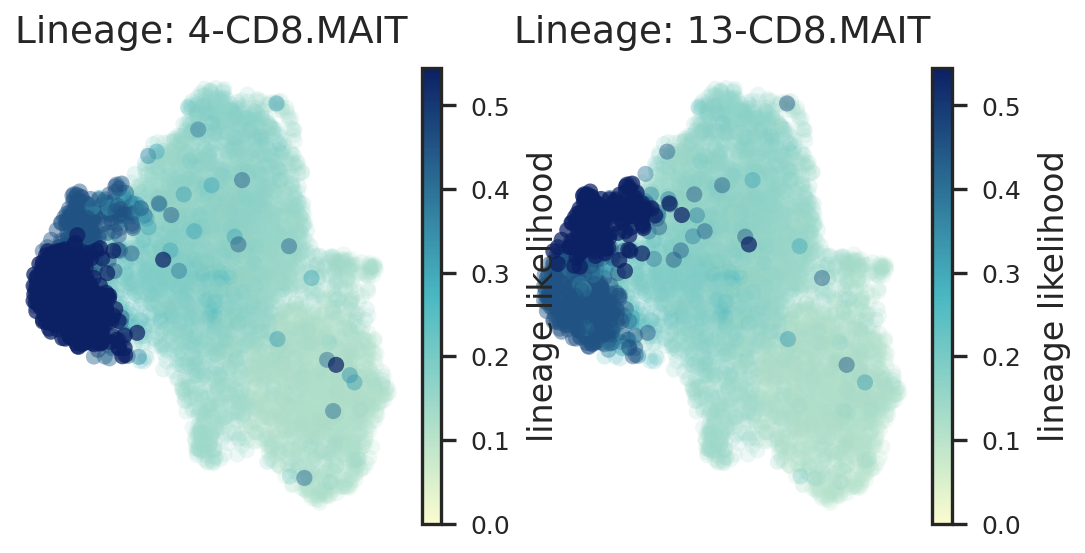

In [132]:
fig, axs = draw_sc_lineage_probability(via_object=v0, via_fine=v0,embedding=embedding,
                    cmap_name=genecmap,
                    marker_lineages=[4,13])
fig.set_size_inches(4,2)
plt.savefig("Figure3_lineage.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_lineage.png",dpi=300,bbox_inches = 'tight')

# Figure_3F 基因表达随时序变化情况

In [133]:
data = adata_new.raw.to_adata().to_df()
data

A1BG  A1BG-AS1  A1CF  A2M  A2M-AS1  A2ML1  \
AAACCTGCATCCAACA-1_0   0.000000  0.000000   0.0  0.0      0.0    0.0   
AAACGGGCAATAACGA-1_0   0.000000  0.000000   0.0  0.0      0.0    0.0   
AAAGCAAAGGTAGCTG-1_0   0.000000  0.000000   0.0  0.0      0.0    0.0   
AAAGCAAGTGACTCAT-1_0   0.000000  0.000000   0.0  0.0      0.0    0.0   
AAAGTAGCAGTAAGAT-1_0   2.058039  0.000000   0.0  0.0      0.0    0.0   
...                         ...       ...   ...  ...      ...    ...   
TTTGCGCAGTGAACAT-1_11  0.000000  0.000000   0.0  0.0      0.0    0.0   
TTTGCGCCACTCGACG-1_11  0.000000  0.000000   0.0  0.0      0.0    0.0   
TTTGCGCGTCCATCCT-1_11  0.000000  0.000000   0.0  0.0      0.0    0.0   
TTTGTCACAAGACACG-1_11  0.000000  0.000000   0.0  0.0      0.0    0.0   
TTTGTCAGTGTAACGG-1_11  0.000000  1.316209   0.0  0.0      0.0    0.0   

                       A2ML1-AS1  A2MP1  A3GALT2  A4GALT  ...  ZW10    ZWILCH  \
AAACCTGCATCCAACA-1_0         0.0    0.0      0.0     0.0  ...   0.0  0.000000   
AAACGGGCAATAACGA-1_0         0.0    0.0      0.0     0.0  ...   0.0  0.000000   
AAAGCAAAGGTAGCTG-1_0         0.0    0.0      0.0     0.0  ...   0.0  0.000000   
AAAGCAAGTGACTCAT-1_0         0.0    0.0      0.0     0.0  ...   0.0  1.424929   
AAAGTAGCAGTAAGAT-1_0         0.0    0.0      0.0     0.0  ...   0.0  0.000000   
...                          ...    ...      ...     ...  ...   ...       ...   
TTTGCGCAGTGAACAT-1_11        0.0    0.0      0.0     0.0  ...   0.0  0.000000   
TTTGCGCCACTCGACG-1_11        0.0    0.0      0.0     0.0  ...   0.0  0.000000   
TTTGCGCGTCCATCCT-1_11        0.0    0.0      0.0     0.0  ...   0.0  0.000000   
TTTGTCACAAGACACG-1_11        0.0    0.0      0.0     0.0  ...   0.0  0.000000   
TTTGTCAGTGTAACGG-1_11        0.0    0.0      0.0     0.0  ...   0.0  0.000000   

                       ZWINT  ZXDA  ZXDB      ZXDC  ZYG11A  ZYG11B       ZYX  \
AAACCTGCATCCAACA-1_0     0.0   0.0   0.0  0.000000     0.0     0.0  1.425169   
AAACGGGCAATAACGA-1_0     0.0   0.0   0.0  1.292343     0.0     0.0  1.292343   
AAAGCAAAGGTAGCTG-1_0     0.0   0.0   0.0  0.000000     0.0     0.0  0.000000   
AAAGCAAGTGACTCAT-1_0     0.0   0.0   0.0  1.424929     0.0     0.0  1.424929   
AAAGTAGCAGTAAGAT-1_0     0.0   0.0   0.0  0.000000     0.0     0.0  0.000000   
...                      ...   ...   ...       ...     ...     ...       ...   
TTTGCGCAGTGAACAT-1_11    0.0   0.0   0.0  0.000000     0.0     0.0  1.524587   
TTTGCGCCACTCGACG-1_11    0.0   0.0   0.0  0.000000     0.0     0.0  2.526680   
TTTGCGCGTCCATCCT-1_11    0.0   0.0   0.0  0.000000     0.0     0.0  0.000000   
TTTGTCACAAGACACG-1_11    0.0   0.0   0.0  0.000000     0.0     0.0  0.000000   
TTTGTCAGTGTAACGG-1_11    0.0   0.0   0.0  0.000000     0.0     0.0  2.217874   

                       ZZEF1  
AAACCTGCATCCAACA-1_0     0.0  
AAACGGGCAATAACGA-1_0     0.0  
AAAGCAAAGGTAGCTG-1_0     0.0  
AAAGCAAGTGACTCAT-1_0     0.0  
AAAGTAGCAGTAAGAT-1_0     0.0  
...                      ...  
TTTGCGCAGTGAACAT-1_11    0.0  
TTTGCGCCACTCGACG-1_11    0.0  
TTTGCGCGTCCATCCT-1_11    0.0  
TTTGTCACAAGACACG-1_11    0.0  
TTTGTCAGTGTAACGG-1_11    0.0  

[6268 rows x 32559 columns]

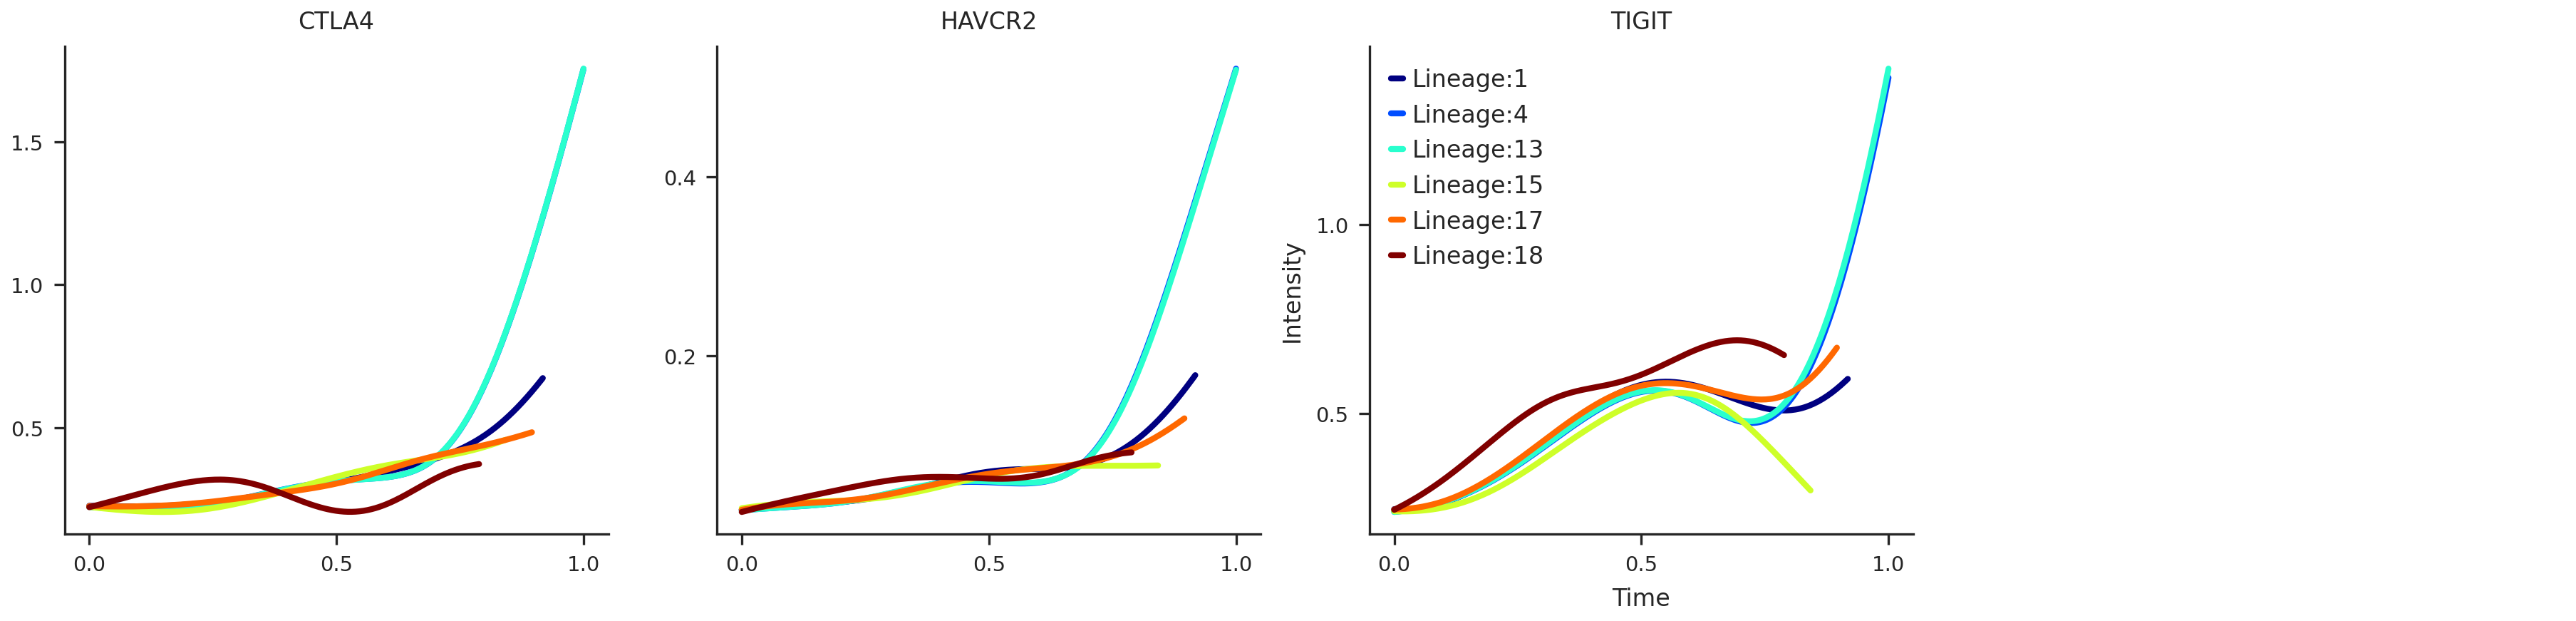

In [134]:
df_subset = pd.DataFrame(data.loc[:,['CTLA4','HAVCR2','TIGIT']], columns=['CTLA4','HAVCR2','TIGIT'])
fig, axs = get_gene_expression(v0, gene_exp=df_subset, cmap='jet',linewidth=2, fontsize_=8, spline_order=4, n_splines=10
                #marker_lineages=[3,12]
                ) #default parameters shown here for retrieving gene expression
fig.set_size_inches(15,3)
plt.savefig("Figure3_Expression.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_Expression.png",dpi=300,bbox_inches = 'tight')

# Figure_3G 关键基因分布情况

In [135]:
ax = sc.pl.embedding(
    adata_new,
    basis="X_umap",
    color=['NCR3','SLC4A10','ZBTB16','CTLA4','HAVCR2','TIGIT','T/NK_celltype'],
   # title='Celltypes',
    frameon=False,
    ncols=3,
    #save='_figure1_celltype.png',
    return_fig=False,
    show=False,
)


#plt.savefig("Figure3_celltype_Umap_scRNA.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_celltype_Umap_scRNA.png",dpi=300,bbox_inches = 'tight')

Output hidden; open in https://colab.research.google.com to view.

# Figure_3H 新亚群鉴定,标记基因鉴定

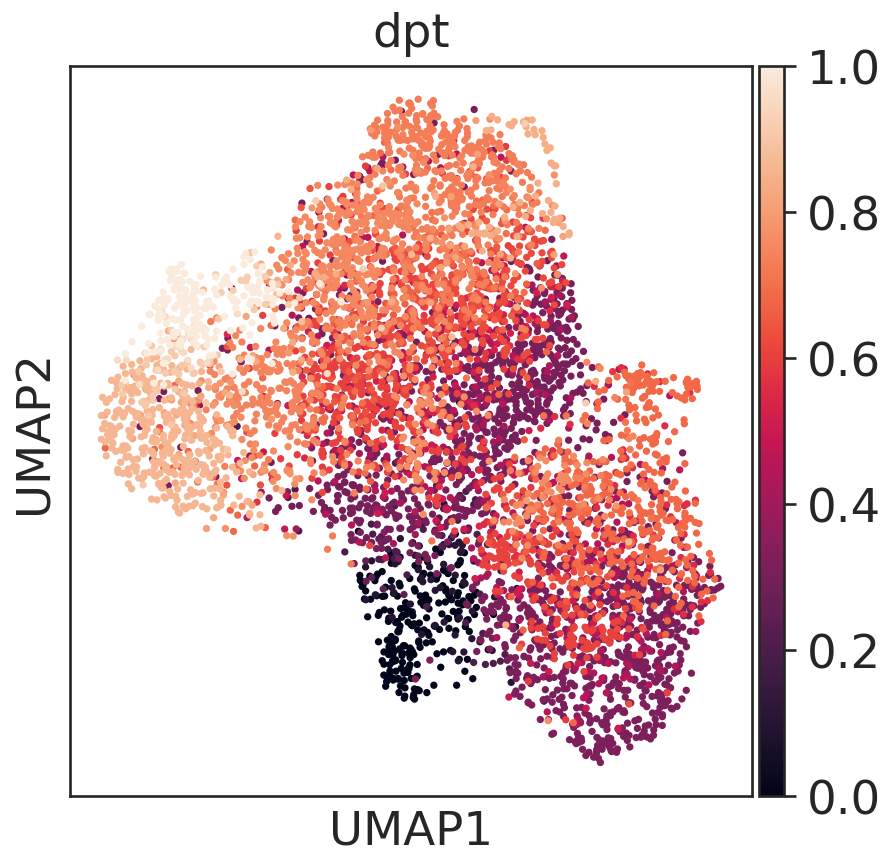

In [154]:
adata_new.obs['dpt'] = v0.single_cell_pt_markov
sc.pl.umap(adata_new,color=['dpt'])

In [155]:
adata_MAIT = adata_new[adata_new.obs['T/NK_celltype']=='CD8.MAIT']
adata_MAIT

View of AnnData object with n_obs × n_vars = 813 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'dpt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [156]:
sc.pp.neighbors(adata_MAIT, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata_MAIT)
sc.tl.paga(adata_MAIT)
sc.pl.paga(adata_MAIT, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_MAIT,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


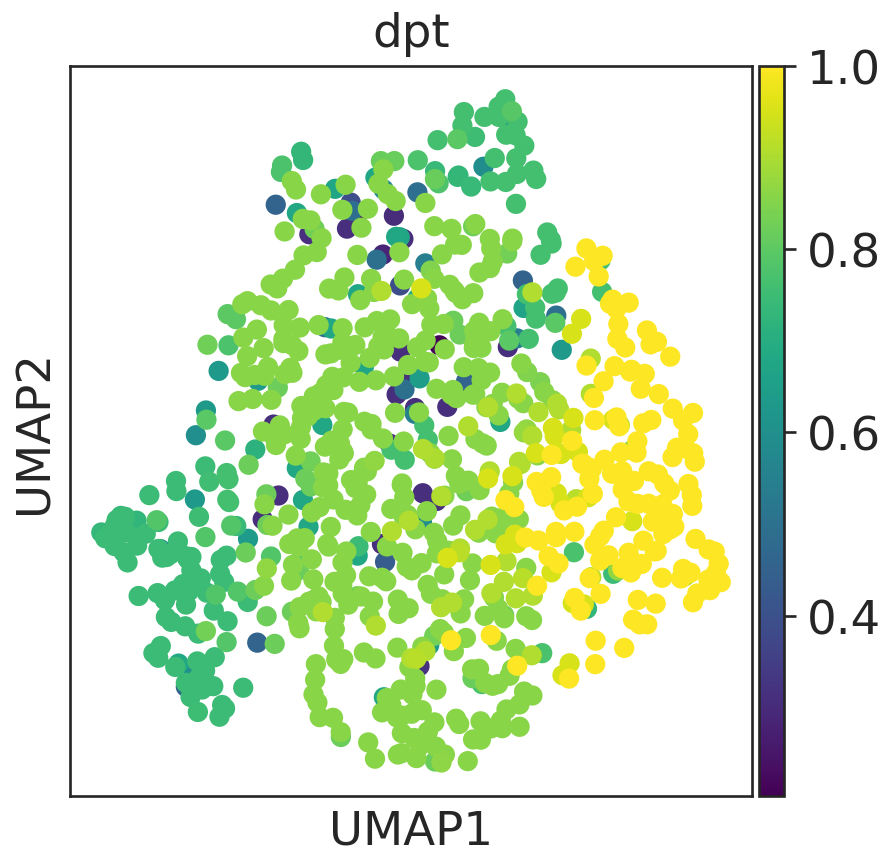

In [158]:
#adata_new.obs['dpt'] = v0.single_cell_pt_markov
sc.pl.umap(adata_MAIT,color=['dpt'],color_map='viridis')

In [54]:
marker_genes_dict = {
    'MAIT.Exhausted':['CTLA4','HAVCR2','TIGIT','PDCD1'], 
}
# reference: https://www.jianshu.com/p/0c745b965620

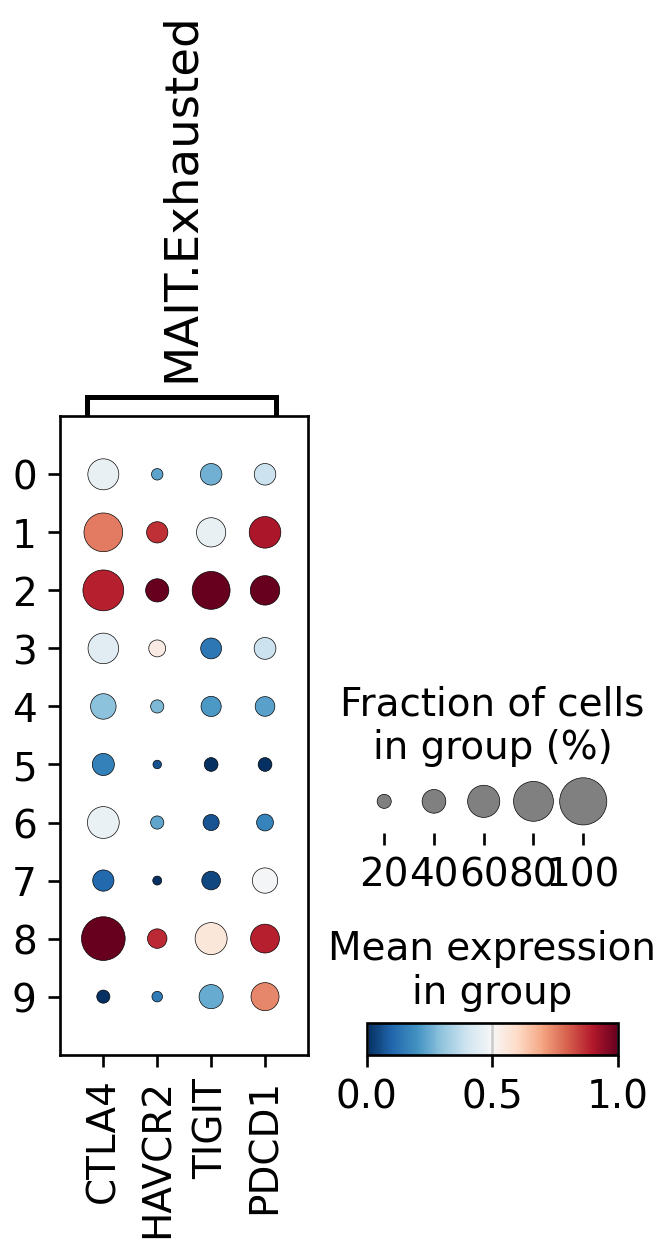

In [55]:
#sc.tl.dendrogram(adata,groupby='T/NK_celltype')
sc.pl.dotplot(
    adata_MAIT,
    marker_genes_dict,
    groupby='leiden',
    dendrogram=False,
    color_map="RdBu_r",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
)

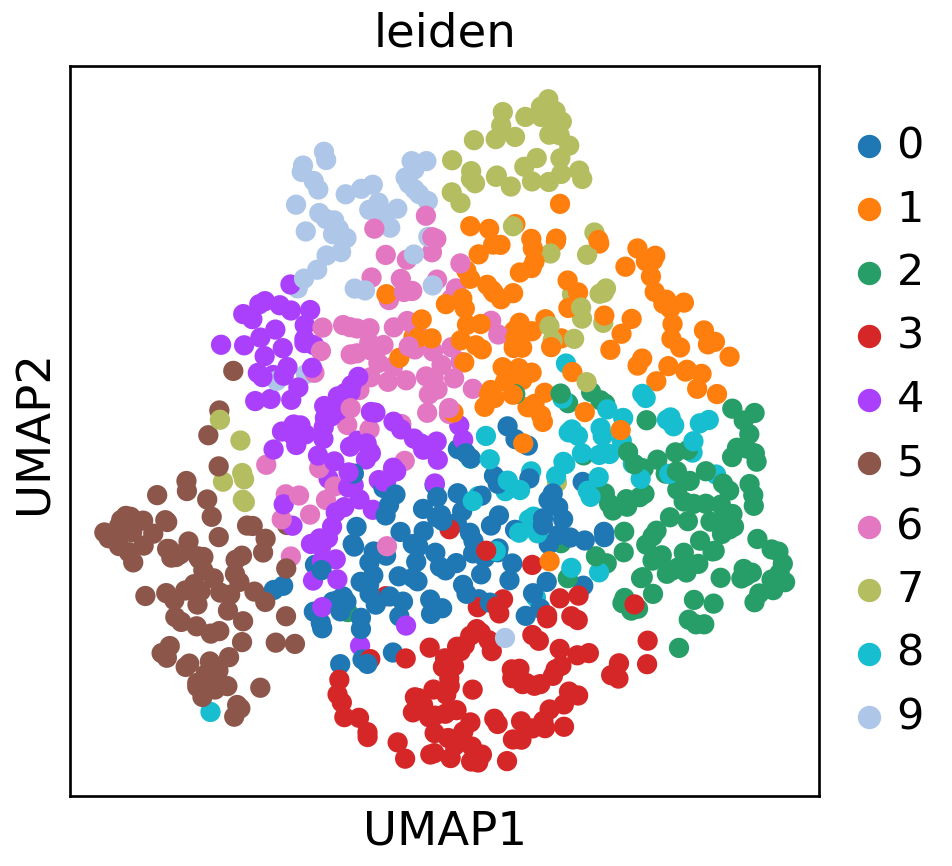

In [56]:
sc.pl.umap(adata_MAIT,color=['leiden'])

In [57]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '1': 'MAIT.Exhausted',
    '2': 'MAIT.Exhausted',
    '8': 'MAIT.Exhausted',
    '3': 'MAIT.Termination',
    '4': 'MAIT.Termination',
    '5': 'MAIT.Termination',
    '6': 'MAIT.Termination',
    '7': 'MAIT.Termination',
    '0': 'MAIT.Termination',
    '9': 'MAIT.Termination',
}
adata_MAIT.obs['T/NK_celltype'] = adata_MAIT.obs['leiden'].map(cluster2annotation).astype('category')

In [58]:
adata_MAIT

AnnData object with n_obs × n_vars = 813 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [59]:
adata_MAIT.uns['T/NK_celltype_colors']=[sc_color_Tcell[8],sc_color_Tcell[11]]

In [60]:
sc_color_Tcell

['#8A29E3',
 '#9B1A83',
 '#C453A4',
 '#C67BAE',
 '#E68BC3',
 '#DFEAF6',
 '#9DCBE3',
 '#4292C5',
 '#0A529B',
 '#F99FB5',
 '#BC7EBC',
 '#ACD2E7',
 '#F582BD',
 '#C4DDF1',
 '#366BAF']

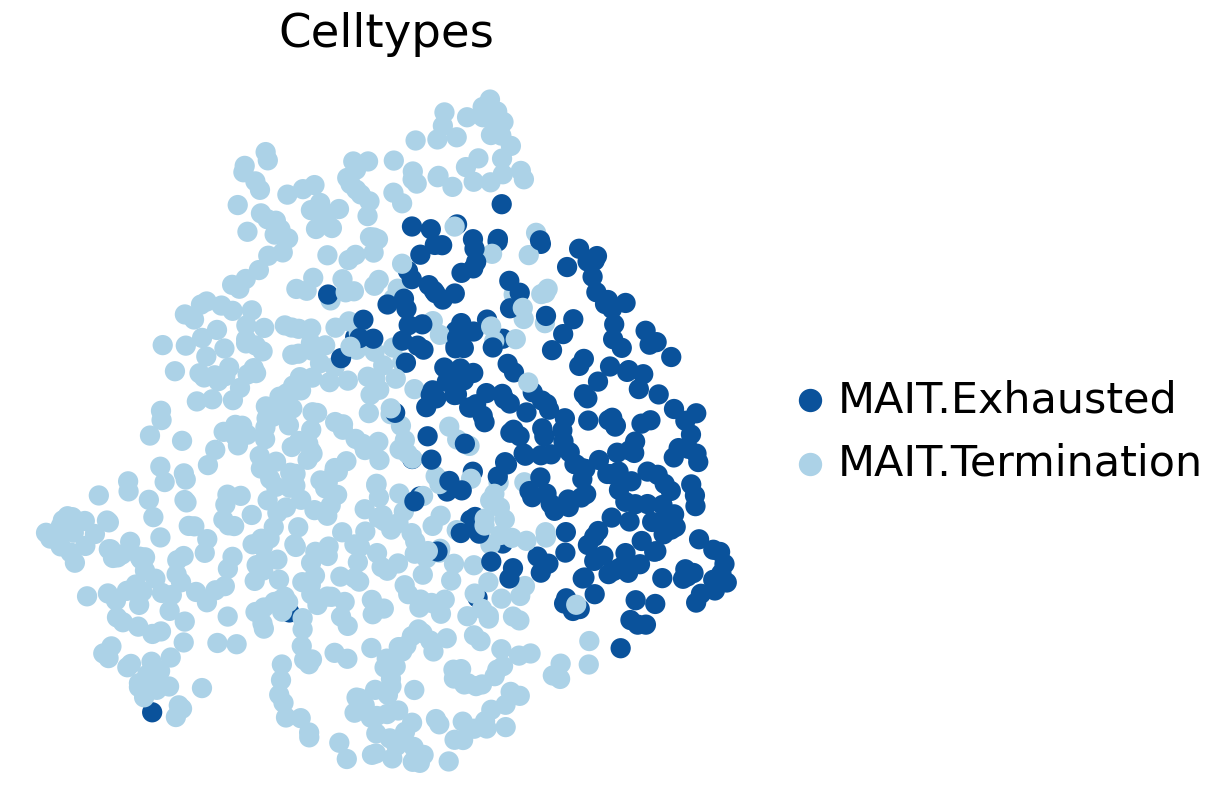

In [61]:
ax = sc.pl.embedding(
    adata_MAIT,
    basis="X_umap",
    color='T/NK_celltype',
    title='Celltypes',
    frameon=False,
    ncols=3,
    #save='_figure1_celltype.png',
    return_fig=False,
    show=False,
)


plt.savefig("Figure3_MAIT.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_MAIT.png",dpi=300,bbox_inches = 'tight')

In [62]:
marker_genes_dict = {
    'Exhausted':['CTLA4','HAVCR2','TIGIT','PDCD1'], 
    'Marker':['KLRB1','ZBTB16','RORC','CD69','ICOS','CCR6','RORA']
}
# reference: https://www.jianshu.com/p/0c745b965620

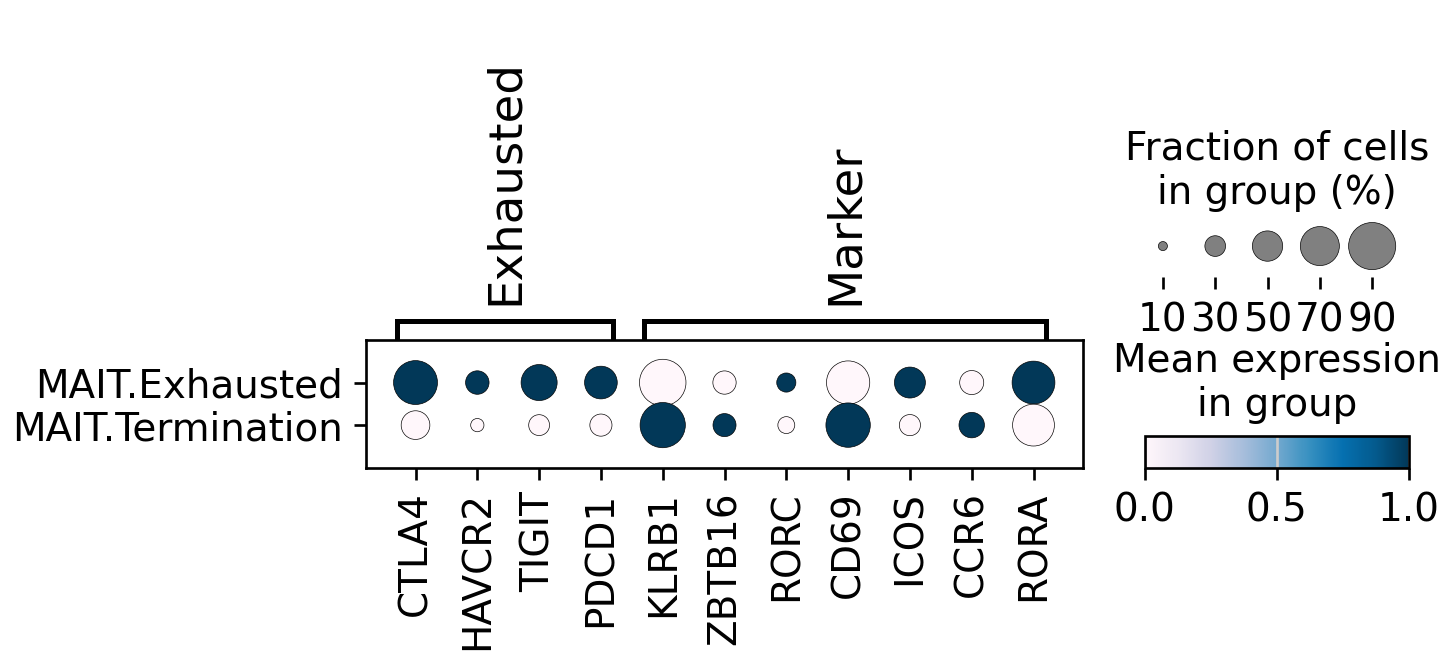

In [63]:

sc.pl.dotplot(
    adata_MAIT,
    marker_genes_dict,
    groupby='T/NK_celltype',
    dendrogram=False,
    color_map="PuBu",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
    var_group_labels=True, # 是否需要var
    show = False
      #  figsize=(4,2),

)
# 代码无效，记得修正
plt.savefig("Figure3_MAIT_Marker.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_MAIT_Marker.png",dpi=300,bbox_inches = 'tight')

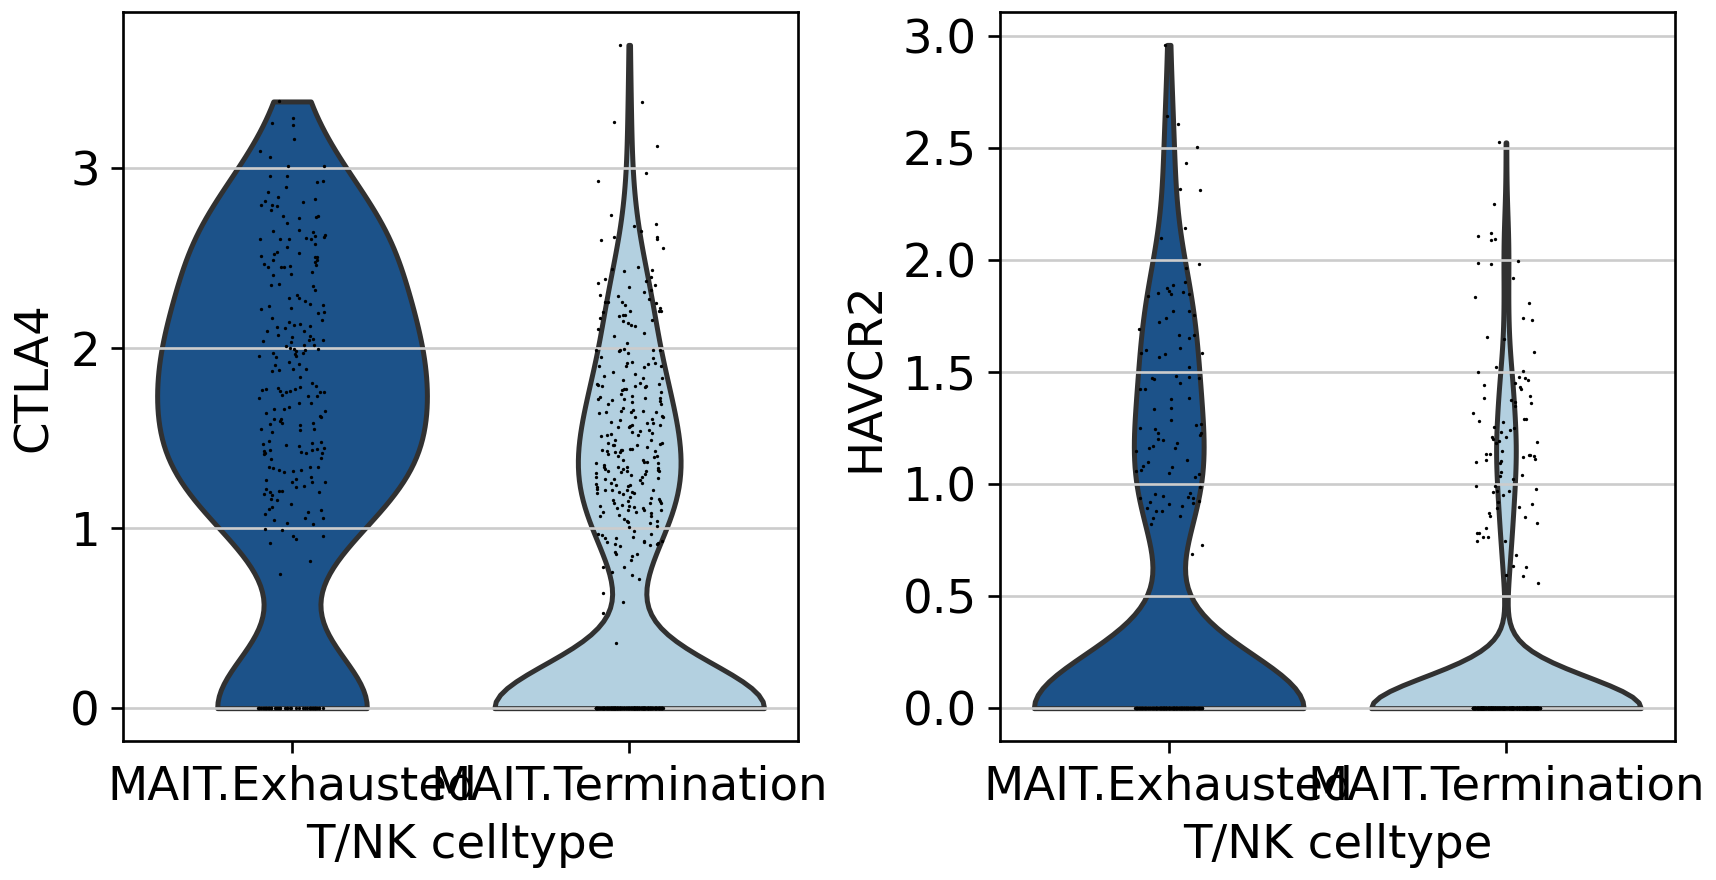

In [64]:
#with rc_context({'figure.figsize': (4.5, 3)}):
sc.pl.violin(adata_MAIT, ['CTLA4','HAVCR2',], groupby='T/NK_celltype' )

## 图例

In [65]:
adata_MAIT.obs.loc[:,'T/NK_celltype'].unique()

['MAIT.Termination', 'MAIT.Exhausted']
Categories (2, object): ['MAIT.Exhausted', 'MAIT.Termination']

In [66]:
marker_genes_dict_var = {
    'MAIT.Exhausted':['GZMK','GZMM','CD74','GZMH'], #  CD8+细胞毒性T淋巴细胞(CTL) 等价于 CD8效应记忆细胞
    'MAIT.Termination':['DUSP1','FOS','FOSB','JUN'], 
  
}

In [67]:
# 计算平均基因表达量函数
def Get_average_Gene_Expression(adata,Normalized):
  # 输入adata文件，判断是否存在adata.raw
  if adata.raw == None:
    adata = adata
  else: 
    adata = adata.raw.to_adata()
    
  sc.pp.filter_genes(adata, min_cells=3)
  # 提取计算平均基因表达量
  # marker_genes_dict_var.keys()是为了指定细胞类型顺序
  Gene_Expression = pd.DataFrame(index = adata.var.index)
  for i in adata.obs['T/NK_celltype'].cat.categories:
    adata_new = adata[adata.obs['T/NK_celltype']==i]
    Gene_Expression.loc[:,i] = np.average(adata_new.X.todense().A,axis=0)

  # 转置
  Gene_Expression = Gene_Expression

  # 是否标准化
  if Normalized == True:
    Gene_Expression = (Gene_Expression-Gene_Expression.min())/ (Gene_Expression.max()-Gene_Expression.min())
    Gene_Expression = Gene_Expression.dropna(axis=1, how='all')
  
  return Gene_Expression

In [68]:
marker_genes_dict_var

{'MAIT.Exhausted': ['GZMK', 'GZMM', 'CD74', 'GZMH'],
 'MAIT.Termination': ['DUSP1', 'FOS', 'FOSB', 'JUN']}

In [69]:
# 得到基因表达谱
Gene_Expression = Get_average_Gene_Expression(adata_MAIT,Normalized=True)
Gene_Expression = Gene_Expression[marker_genes_dict_var]
Gene_Expression

filtered out 17846 genes that are detected in less than 3 cells


MAIT.Exhausted  MAIT.Termination
A1BG            0.027684          0.031538
A1BG-AS1        0.008135          0.013532
A2M             0.004668          0.003296
A2M-AS1         0.006032          0.006966
A4GALT          0.000000          0.000901
...                  ...               ...
ZXDB            0.017095          0.005885
ZXDC            0.034955          0.027362
ZYG11B          0.005249          0.007626
ZYX             0.136967          0.129422
ZZEF1           0.075281          0.067693

[14713 rows x 2 columns]

In [70]:
# 获得var（纵轴annotation）
def Get_Celltype_of_MarkerGene(Gene_Expression,groupby):
  var = pd.DataFrame(index = Gene_Expression.columns, columns = groupby)
  for i in marker_genes_dict_var.keys():
    print('Now we get '+str(i))
    gene = marker_genes_dict_var.get(i)
    for j in gene:
      var.loc[j,:] = i
  return var #提取marker基因

var = Get_Celltype_of_MarkerGene(Gene_Expression,['celltype'])
var.dropna(inplace=True)
var

Now we get MAIT.Exhausted
Now we get MAIT.Termination


celltype
GZMK     MAIT.Exhausted
GZMM     MAIT.Exhausted
CD74     MAIT.Exhausted
GZMH     MAIT.Exhausted
DUSP1  MAIT.Termination
FOS    MAIT.Termination
FOSB   MAIT.Termination
JUN    MAIT.Termination

Starting plotting HeatmapAnnotations


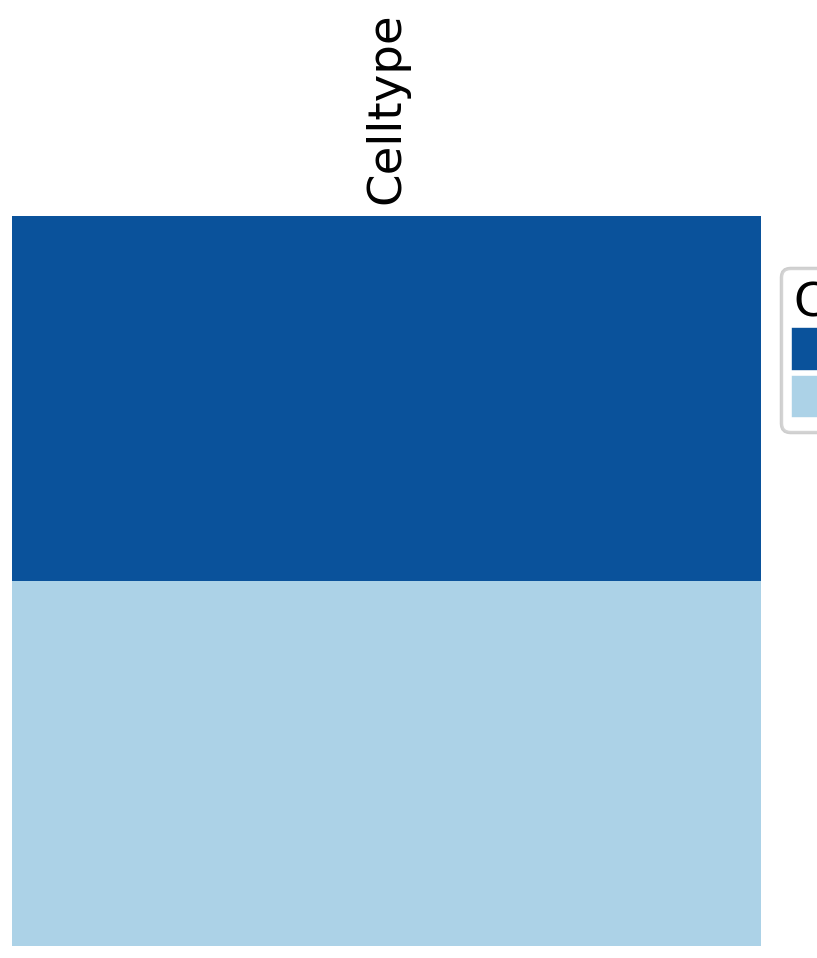

In [71]:
index_ha = HeatmapAnnotation(Celltype=anno_simple(var.loc[:,'celltype'], 
                colors=adata_MAIT.uns['T/NK_celltype_colors'], add_text=False, legend=True, height=5),axis=0, # 绘制T/NK_type注释
               plot=True,legend=False,legend_gap=3,legend_hpad=0,legend_width=3
                           )

No ax was provided, using plt.gca()


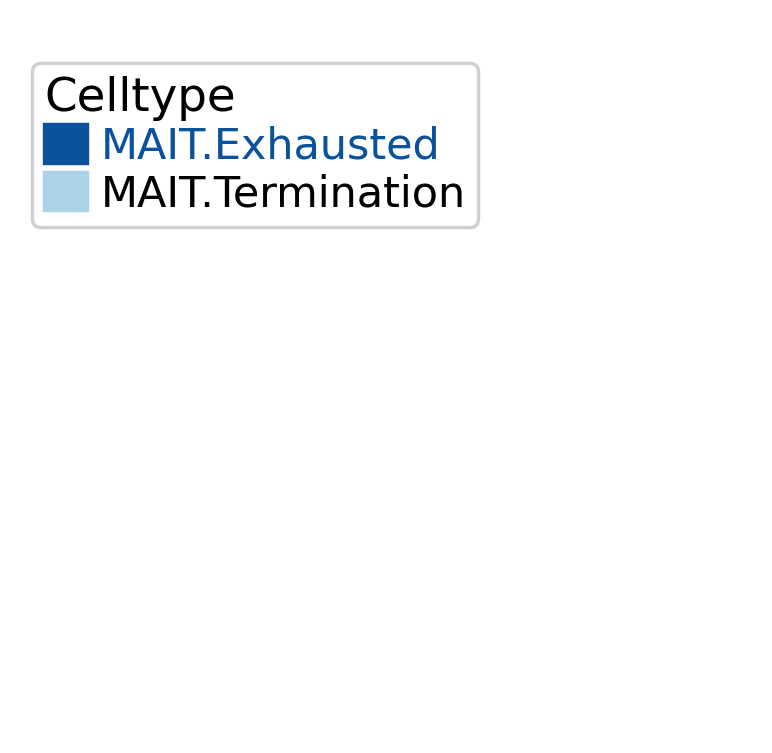

In [73]:
# 绘制没画出来的图例
plt.figure()
index_ha.plot_legends()
plt.savefig("Figure3_MAIT_legend.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_MAIT_legend.png",dpi=300,bbox_inches = 'tight')
plt.show()

# Figure_3I 细胞因子表达分布情况

In [74]:
marker_genes_dict = {
    'Cytokine':['TNF','IFNG','IL17A','IL17F','IL22','IL26','CSF2','IL10','IL12A'], 
    
}
# reference: https://www.jianshu.com/p/0c745b965620

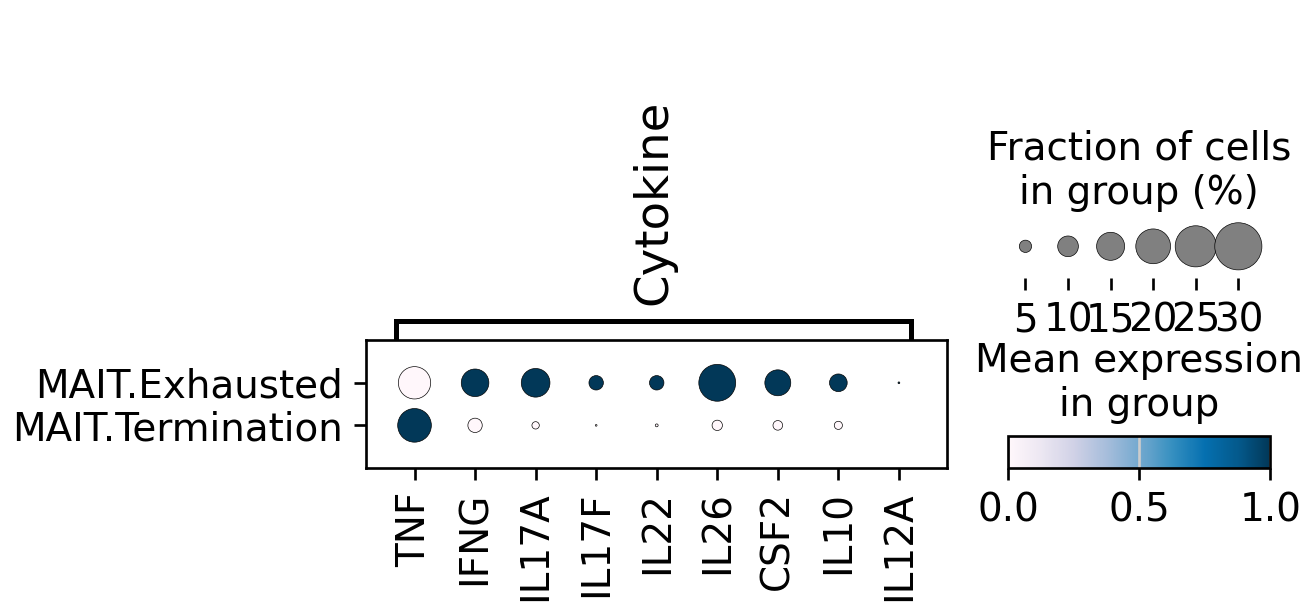

In [75]:
sc.pl.dotplot(
    adata_MAIT,
    marker_genes_dict,
    groupby='T/NK_celltype',
    dendrogram=False,
    color_map="PuBu",
    swap_axes=False,
    use_raw=True,
    standard_scale="var",
    var_group_labels=False, # 是否需要var
    show = False
      #  figsize=(4,2),

)

plt.savefig("Figure3_MAIT_Cytokine.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure1/Figure3_MAIT_Cytokine.png",dpi=300,bbox_inches = 'tight')

# Figure_3J 差异基因表达

In [76]:
adata_MAIT_Exhausted = adata_MAIT[adata_MAIT.obs['T/NK_celltype']=='MAIT.Exhausted']
adata_MAIT_Normal = adata_MAIT[adata_MAIT.obs['T/NK_celltype']!='MAIT.Exhausted']
adata_MAIT_Exhausted,adata_MAIT_Normal

(View of AnnData object with n_obs × n_vars = 259 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
     uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'leiden_colors'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     varm: 'PCs'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 View of AnnData object with n_obs × n_vars = 554 × 2000
     obs: 'Group_number

In [77]:
adata_MAIT_Exhausted = adata_MAIT_Exhausted.raw.to_adata()
adata_MAIT_Normal = adata_MAIT_Normal.raw.to_adata()
sc.pp.filter_genes(adata_MAIT_Exhausted, min_cells=3)
sc.pp.filter_genes(adata_MAIT_Normal, min_cells=3)

filtered out 20428 genes that are detected in less than 3 cells
filtered out 18742 genes that are detected in less than 3 cells


In [78]:
#得到activated跟gzmk共有的基因集
ret_gene=list(set(adata_MAIT_Exhausted.var.index.tolist()) & set(adata_MAIT_Normal.var.index.tolist()))
len(ret_gene)
#筛选共有基因
adata_MAIT_Exhausted=adata_MAIT_Exhausted[:,ret_gene]
adata_MAIT_Normal=adata_MAIT_Normal[:,ret_gene]
adata_MAIT_Exhausted,adata_MAIT_Normal

(View of AnnData object with n_obs × n_vars = 259 × 11868
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', 'T', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors', 'leiden_colors'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     obsp: 'connectivities', 'distances',
 View of AnnData object with n_obs × n_vars = 554 × 11868
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_

In [79]:
!pip install adjustText
!pip install seaborn
import adjustText
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
from scipy  import stats,sparse

def scdeg(adata1,adata2):
    mean1=adata1.X.mean(axis=0)
    mean2=adata2.X.mean(axis=0)

    if sparse.issparse(adata1.X):
        fold=np.array(adata1.X.mean(axis=0)-adata2.X.mean(axis=0))[0]
        #fold=fold[0]
        #log2fold=np.log2(fold)
        ttest = stats.ttest_ind(adata1[:,:].X.toarray(),adata2[:,:].X.toarray())
    else:
        fold=adata1.X.mean(axis=0)-adata2.X.mean(axis=0)
        #log2fold=np.log2(fold)
        ttest = stats.ttest_ind(adata1[:,:].X,adata2[:,:].X) 
    pvalue=ttest.pvalue+1e-100

    res=pd.DataFrame(index=adata1.var.index)
    res['log2FC']=fold
    res['pvalue']=pvalue
    return res

In [81]:
deg_r=scdeg(adata_MAIT_Exhausted,adata_MAIT_Normal)
deg_r['-log10pvalue']=''
deg_r['-log10pvalue']=-np.log10(deg_r['pvalue'])
deg_r

log2FC    pvalue  -log10pvalue
HDAC1     0.039974  0.403694      0.393947
RNASEH2A -0.008104  0.698225      0.156005
PARP14   -0.003114  0.936320      0.028576
OXR1     -0.019259  0.452262      0.344610
FLT1      0.057051  0.003260      2.486834
...            ...       ...           ...
SLC35E2B  0.018911  0.557460      0.253786
MANEA     0.030803  0.201070      0.696653
SPICE1   -0.003870  0.835707      0.077946
SLC35C1   0.041598  0.025596      1.591828
NUP160    0.053192  0.101057      0.995433

[11868 rows x 3 columns]

In [82]:
group = []
data = deg_r
for i in data.index:
    if data['-log10pvalue'][i] > 10.0 and np.abs(data['log2FC'][i]) >= 0.5:
        group.append('Both significant')
    else:
        group.append('Not significant')
data['group'] = group
data = data.sort_values('group')
print(data)

          log2FC        pvalue  -log10pvalue             group
GNLY    0.744359  3.350648e-21     20.474871  Both significant
CD7     0.698411  4.580821e-20     19.339056  Both significant
DUSP4   0.598853  4.497845e-13     12.346995  Both significant
LAG3    0.851374  1.488588e-25     24.827225  Both significant
IL7R   -0.776618  1.471767e-14     13.832161  Both significant
...          ...           ...           ...               ...
TULP4   0.026931  3.516060e-01      0.453944   Not significant
HPGD   -0.137941  9.587826e-03      2.018280   Not significant
KIF2A  -0.015539  7.341016e-01      0.134244   Not significant
FAM24B -0.007175  6.017252e-01      0.220602   Not significant
NUP160  0.053192  1.010572e-01      0.995433   Not significant

[11868 rows x 4 columns]


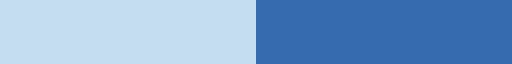

In [83]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap([sc_color_Tcell[13],sc_color_Tcell[14]])
cmap

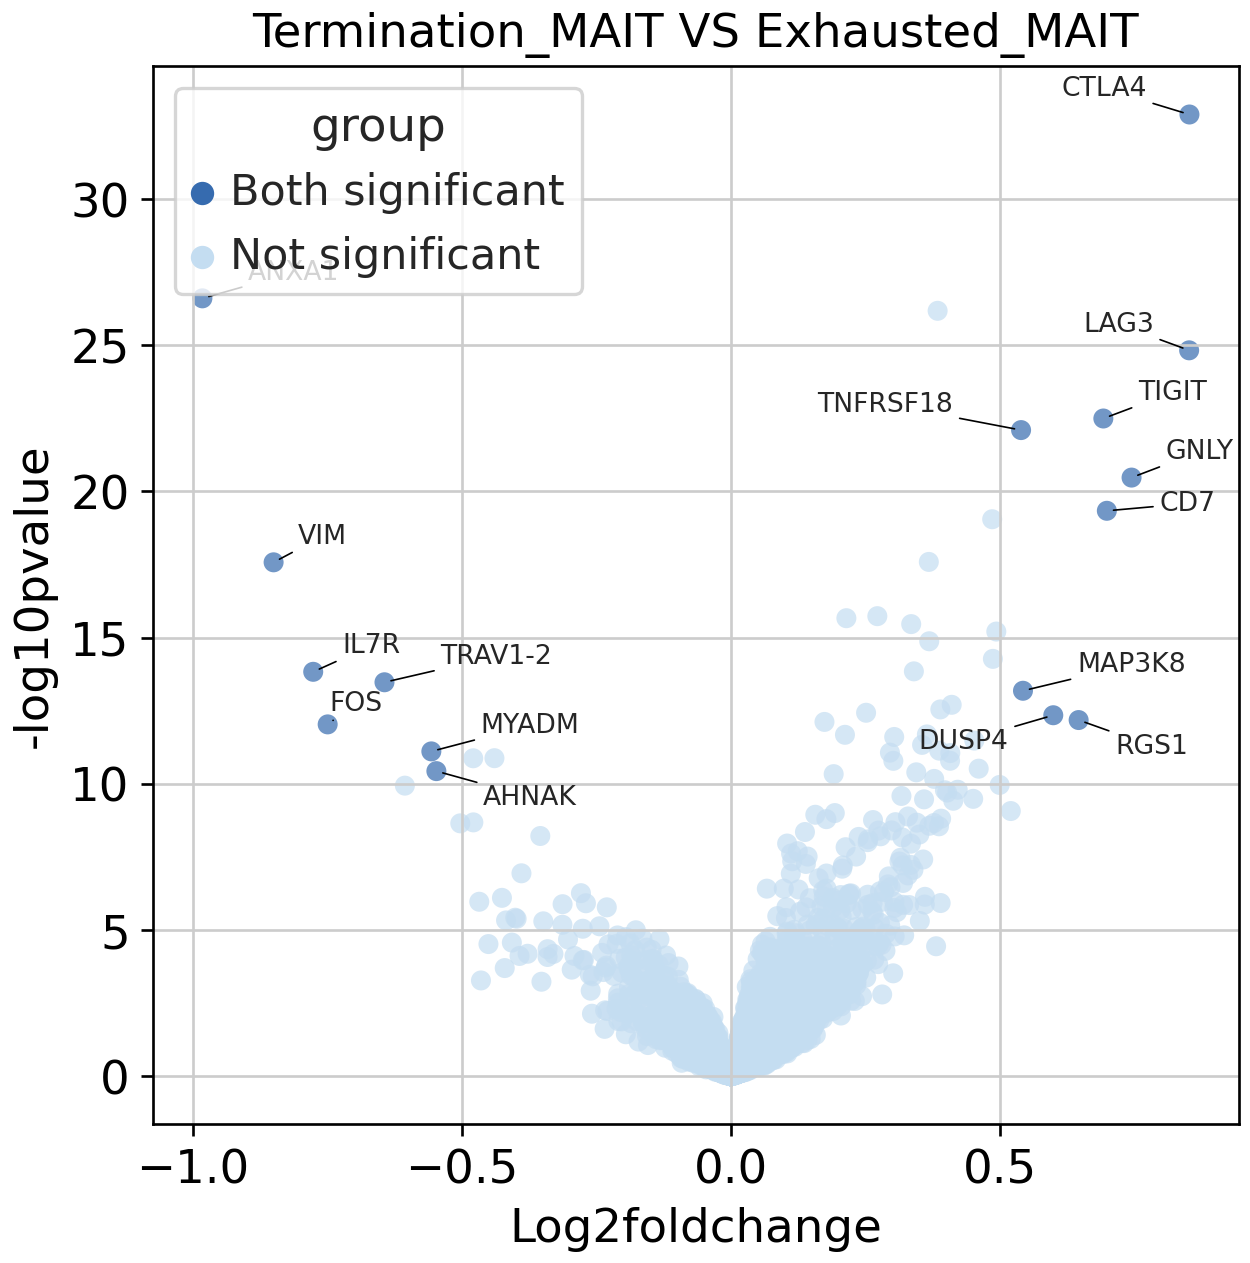

In [84]:
# Seaborn绘图
f, ax = plt.subplots(figsize=(5.8, 5.8))
sns.set_style("ticks") #设置全局主题
sns.scatterplot(data=data, x="log2FC", y="-log10pvalue", marker='o', alpha=0.7, edgecolor='none', 
                palette=[sc_color_Tcell[14],sc_color_Tcell[13]], # 分类颜色映射
                hue="group", legend='brief',)
#plt.axvline(x = 0.6, ls = '--', color = 'black', lw = 1) #画虚线
#plt.axvline(x = -0.6, ls = '--', color = 'black', lw = 1)
#plt.axhline(y = 30, ls = '--', color = 'black', lw = 1)
plt.xlabel('Log2foldchange')

# 绘制文本注释
markers = data[data['group'] == 'Both significant']
markers['Gene'] = markers.index
texts = []
for i in markers.index:
    x, y, s = markers.loc[i, 'log2FC'], markers.loc[i, '-log10pvalue'], markers.loc[i, 'Gene']
    texts.append(plt.text(x, y, s, fontsize = 8))

# 文本注释位置优化
from adjustText import adjust_text
adjust_text(texts, force_points=0.2, force_text=1,precision=0.00001,
            expand_points=(2, 2), expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# 保存
plt.title("Termination_MAIT VS Exhausted_MAIT") #设置标题
plt.savefig("Figure3_MAIT_DEG_.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure3_MAIT_DEG_.png",dpi=300,bbox_inches = 'tight')

# Figure_3J 
原定是差异基因的功能分析，此部分放于sFigure

## GSEA(Prerank)

Prerank的输入需要进行排序处理

In [85]:
!pip install gseapy
!pip install colormap
!pip install easydev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
# 读取数据
gseada=data
# 删除核糖体基因
gseada = gseada[~gseada.index.str.contains('RPS')]
gseada = gseada[~gseada.index.str.contains('RPL')]
gseada
# 过滤
gseada_sig = gseada[gseada.pvalue < 0.05]
gseada_up = gseada_sig[gseada_sig.log2FC > 0]
gseada_dw = gseada_sig[gseada_sig.log2FC < 0]

In [87]:
rnk_pos=pd.DataFrame()
rnk_pos['gene_name']=gseada_up.index
rnk_pos['rnk']=gseada_up.loc[:,'log2FC'].values
rnk_pos.dropna()
rnk_pos.sort_values(by=['rnk'],ascending=False,inplace=True)
rnk_pos

gene_name       rnk
6          CTLA4  0.851950
3           LAG3  0.851374
0           GNLY  0.744359
1            CD7  0.698411
8          TIGIT  0.691918
...          ...       ...
1762  AL121574.1  0.016839
1793  AL360012.1  0.015708
604         MST1  0.015319
574       PHETA2  0.015119
1830    ANKRD13B  0.015109

[1902 rows x 2 columns]

In [88]:
import gseapy as gp
import numpy as np
pre_res_pos = gp.prerank(rnk=rnk_pos, # or rnk = rnk,
                     gene_sets='KEGG_2021_Human',
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )
#pre_res_pos.res2d['Term'] = pre_res_pos.res2d.index
pre_res_pos.res2d['-log10pvalue'] = -np.log10((pre_res_pos.res2d['NOM p-val']+0.001).astype('float'))
pre_res_pos

2023-05-16 11:21:30,086 [INFO] Parsing data files for GSEA.............................
2023-05-16 11:21:31,437 [INFO] Downloading and generating Enrichr library gene sets......
2023-05-16 11:21:33,473 [INFO] 0084 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-05-16 11:21:33,475 [INFO] 0236 gene_sets used for further statistical testing.....
2023-05-16 11:21:33,477 [INFO] Start to run GSEA...Might take a while..................
2023-05-16 11:21:35,068 [INFO] Congratulations. GSEApy runs successfully................



In [89]:
pre_res_pos.res2d

Name                                               Term        ES  \
0    prerank                  T cell receptor signaling pathway  0.706922   
1    prerank  Viral protein interaction with cytokine and cy...  0.800139   
2    prerank             Cytokine-cytokine receptor interaction  0.676803   
3    prerank                         Hematopoietic cell lineage  0.733399   
4    prerank                   Regulation of actin cytoskeleton  0.634858   
..       ...                                                ...       ...   
231  prerank                                           Melanoma  0.264253   
232  prerank                                 Lysine degradation  0.239726   
233  prerank              RIG-I-like receptor signaling pathway  0.215413   
234  prerank               Other types of O-glycan biosynthesis  0.224058   
235  prerank                                         Peroxisome  0.168461   

          NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0    2.199949       0.0       0.0        0.0  21/28  20.35%   
1    2.144549       0.0       0.0        0.0   6/12   5.36%   
2    2.129819       0.0       0.0        0.0  14/29   9.88%   
3     2.06811       0.0  0.000786      0.002   9/16   7.78%   
4    2.012712       0.0  0.003356      0.015  22/34  20.50%   
..        ...       ...       ...        ...    ...     ...   
231  0.580896  0.936527  0.960045        1.0    5/6  63.25%   
232  0.536863  0.959559  0.978352        1.0    4/6  59.36%   
233  0.475371   0.98882  0.994143        1.0    1/6  13.56%   
234  0.471145   0.99125  0.990593        1.0    3/5  54.63%   
235  0.468928  0.983229  0.986742        1.0  10/15  65.88%   

                                            Lead_genes  -log10pvalue  
0    CTLA4;MAP3K8;CD3D;ICOS;PDCD1;CD4;CD247;PAK2;IT...      3.000000  
1               CCL20;TNFRSF1B;IL2RG;CSF1;IL2RB;CXCL13      3.000000  
2    TNFRSF18;CCL20;TNFRSF1B;IL2RG;TNFRSF9;CD4;CSF1...      3.000000  
3           CD7;ITGA4;CD3D;CD4;CSF1;CD2;CD3G;CD59;CD3E      3.000000  
4    ITGA4;ITGAE;ARHGEF12;MSN;PAK2;ARPC1B;SSH1;ACTR...      3.000000  
..                                                 ...           ...  
231                      GADD45G;CDKN2A;MDM2;PTEN;AKT2      0.028016  
232                             PHYKPL;DLD;EHMT1;EHMT2      0.017476  
233                                               CYLD      0.004444  
234                                  OGT;GALNT2;GALNT1      0.003379  
235  SOD1;PMVK;PRDX5;SCP2;NUDT7;PEX2;IDH2;PEX19;SLC...      0.006904  

[236 rows x 11 columns]

In [90]:
plot_data2 = pre_res_pos.res2d.sort_values('NES',ascending=False)[:10].sort_values('NES')
plot_data2 = plot_data2.sort_values('Gene %')
plot_data2['matched_size'] = plot_data2.loc[:,'Tag %'].str.split('/').str[0].astype(int)
plot_data2['fraction'] = plot_data2.loc[:,'Tag %'].str.split('/').str[0].astype(int) /plot_data2.loc[:,'Tag %'].str.split('/').str[1].astype(int) 
plot_data2

#
#  term: gene set name,
#  es: enrichment score,
#  nes: normalized enrichment score,
#  pval:  Nominal p-value (from the null distribution of the gene set,
#  fdr: FDR qvalue (adjusted False Discory Rate),
#  fwerp: Family wise error rate p-values,
#  tag %: Percent of gene set before running enrichment peak (ES),
#  gene %: Percent of gene list before running enrichment peak (ES),
#  lead_genes: leading edge genes (gene hits before running enrichment peak),
#  matched genes: genes matched to the data,
# }


Name                                               Term        ES  \
6  prerank                           Primary immunodeficiency  0.782257   
8  prerank                               Rheumatoid arthritis  0.680886   
7  prerank                            Cell adhesion molecules  0.667254   
0  prerank                  T cell receptor signaling pathway  0.706922   
4  prerank                   Regulation of actin cytoskeleton  0.634858   
5  prerank                   Th1 and Th2 cell differentiation  0.669394   
9  prerank  Signaling pathways regulating pluripotency of ...  0.741026   
1  prerank  Viral protein interaction with cytokine and cy...  0.800139   
3  prerank                         Hematopoietic cell lineage  0.733399   
2  prerank             Cytokine-cytokine receptor interaction  0.676803   

        NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
6  1.986974       0.0  0.003296      0.019   8/10  13.46%   
8  1.929968  0.001053   0.00769      0.053   9/16  17.19%   
7  1.956706       0.0  0.004457       0.03  12/20  19.09%   
0  2.199949       0.0       0.0        0.0  21/28  20.35%   
4  2.012712       0.0  0.003356      0.015  22/34  20.50%   
5  1.993348       0.0   0.00367      0.018  17/22  24.34%   
9  1.928875       0.0  0.007026      0.054   5/11   5.10%   
1  2.144549       0.0       0.0        0.0   6/12   5.36%   
3   2.06811       0.0  0.000786      0.002   9/16   7.78%   
2  2.129819       0.0       0.0        0.0  14/29   9.88%   

                                          Lead_genes  -log10pvalue  \
6          CD3D;ICOS;IL2RG;CD4;JAK3;CD3E;ZAP70;PTPRC      3.000000   
8  CTLA4;CCL20;CSF1;IL17A;ATP6V1F;ACP5;CSF2;CD28;...      2.687689   
7  CTLA4;TIGIT;ITGA4;ICOS;PDCD1;CD4;CD2;CD6;PTPRC...      3.000000   
0  CTLA4;MAP3K8;CD3D;ICOS;PDCD1;CD4;CD247;PAK2;IT...      3.000000   
4  ITGA4;ITGAE;ARHGEF12;MSN;PAK2;ARPC1B;SSH1;ACTR...      3.000000   
5  MAF;CD3D;IL2RG;CD4;JAK3;IL2RB;CD247;CD3G;CD3E;...      3.000000   
9                       ID2;STAT3;JAK3;JARID2;CTNNB1      3.000000   
1             CCL20;TNFRSF1B;IL2RG;CSF1;IL2RB;CXCL13      3.000000   
3         CD7;ITGA4;CD3D;CD4;CSF1;CD2;CD3G;CD59;CD3E      3.000000   
2  TNFRSF18;CCL20;TNFRSF1B;IL2RG;TNFRSF9;CD4;CSF1...      3.000000   

   matched_size  fraction  
6             8  0.800000  
8             9  0.562500  
7            12  0.600000  
0            21  0.750000  
4            22  0.647059  
5            17  0.772727  
9             5  0.454545  
1             6  0.500000  
3             9  0.562500  
2            14  0.482759

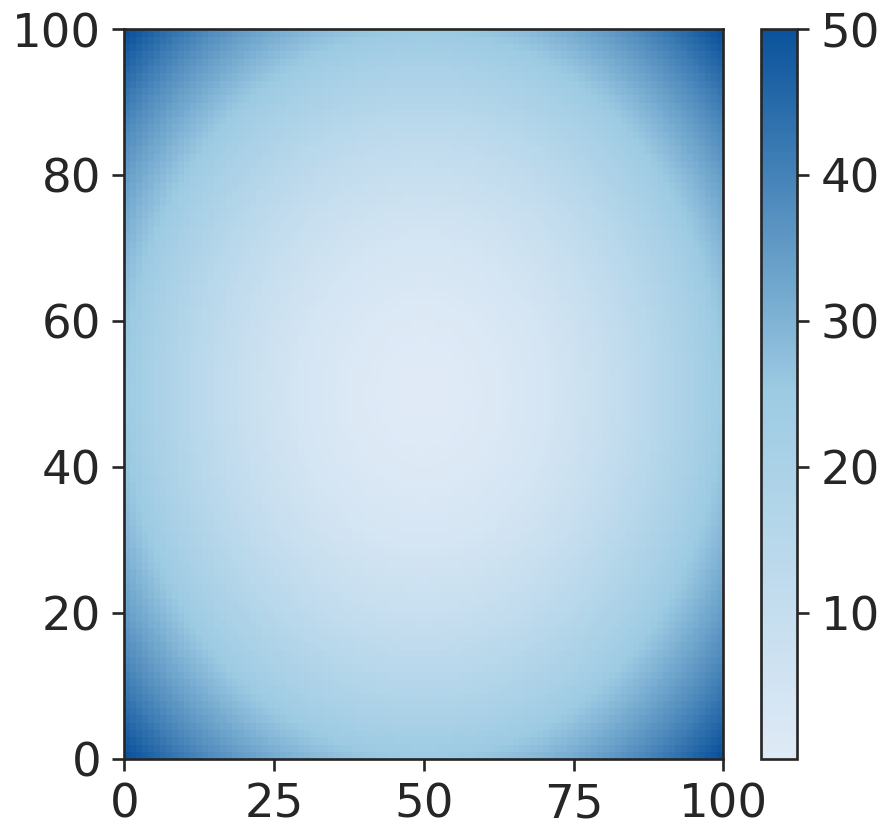

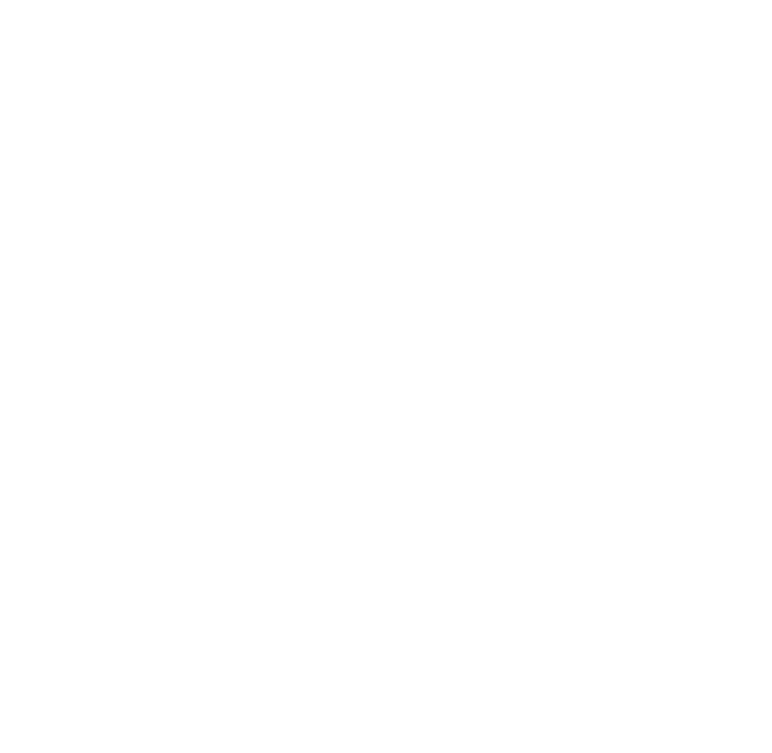

In [91]:
# 对文字部分过长的通路进行裁剪

def plot_text_set(text):
    if len(text)>40:
        ty=text.split(' ')
        ty_len=len(ty)
        ty_mid=ty_len//2
        res=''
        for i in range(ty_len):
            if i!=ty_mid:
                res+=ty[i]+' '
            else:
                res+='\n'+ty[i]+' '
        return res
    else:
        return text

# 绘图备用函数
# 控制颜色函数
from colormap import Colormap
c = Colormap()
gocmap = c.cmap_linear(sc_color_Tcell[5],sc_color_Tcell[6],sc_color_Tcell[8],)
c.test_colormap(gocmap)

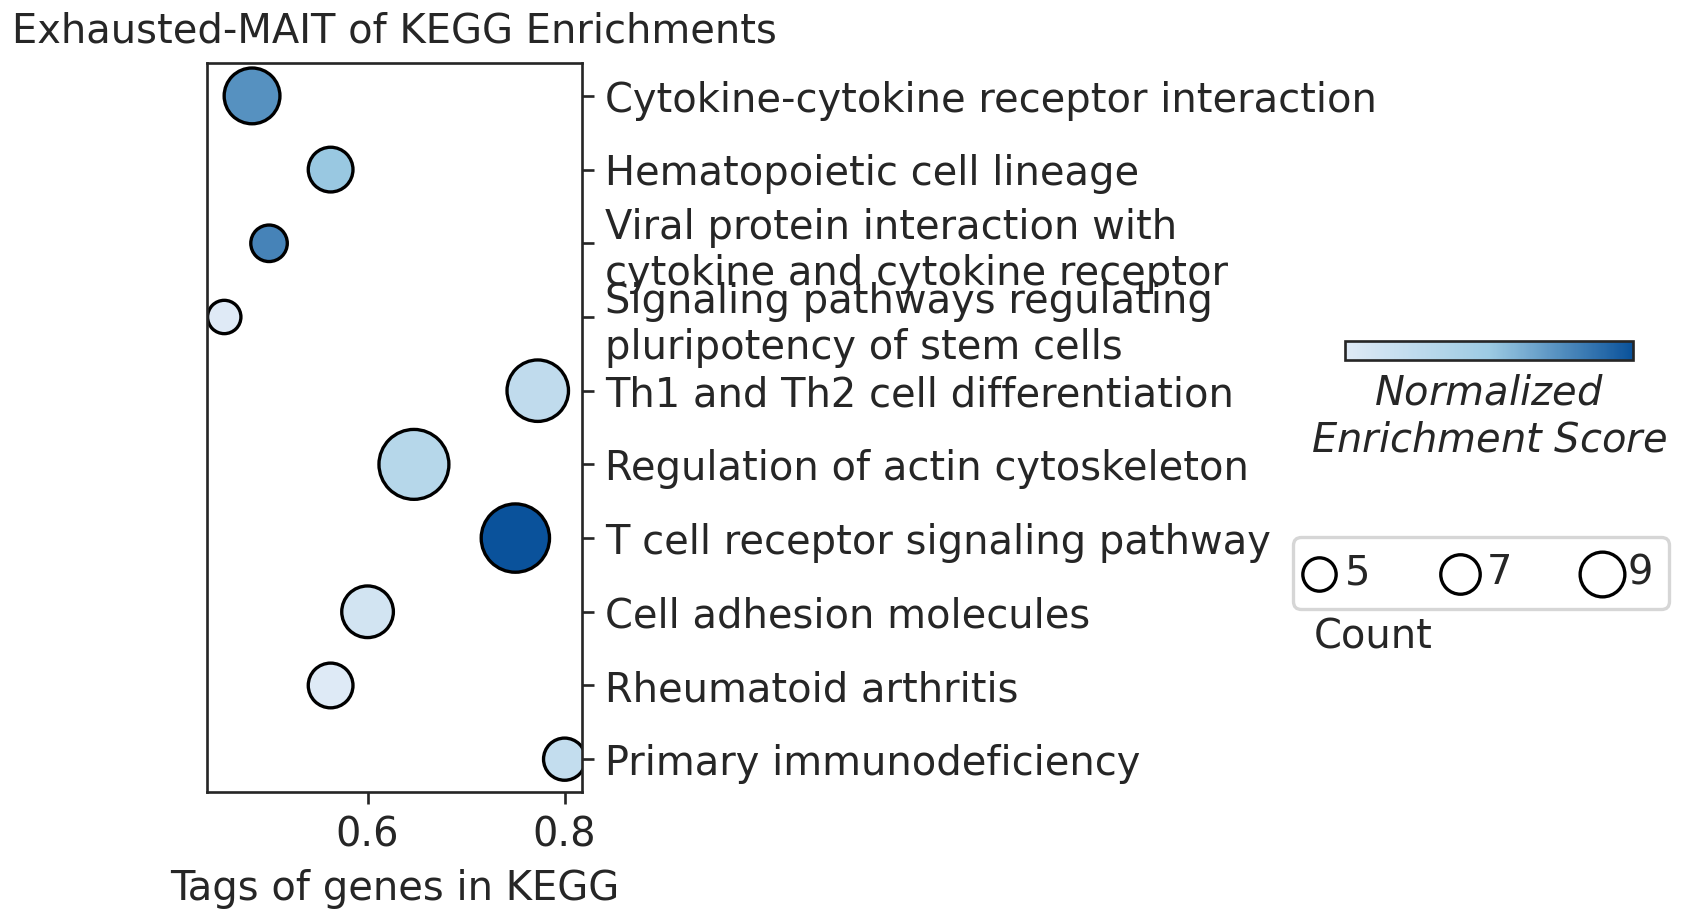

In [92]:
# color
#gocmap = c.cmap_linear('#F8F8D2','#D0E4B1','#6AC6BD',)

pp=plt.figure(figsize=(2,4))
#用ax控制图片
ax=pp.add_subplot(1,1,1)

#圆圈大小控制
a = 20

#绘制网格线
#plt.grid(b=None, which='major', axis='both', )

#plot_data2 = pre_res_pos.res2d.sort_values('fdr')[:9].sort_values('nes')
b=plt.scatter(plot_data2['fraction'],range(len(plot_data2['NES'])),
           s=plot_data2['matched_size']*a,linewidths=1,edgecolors='black',c=plot_data2['NES'],cmap=gocmap)
ax.yaxis.tick_right()
plt.yticks(range(len(plot_data2['fraction'])),[plot_text_set(i.split('(')[0]) for i in plot_data2['Term']],
          fontsize=12,)
plt.xticks(fontsize=12,)
plt.title('Exhausted-MAIT of KEGG Enrichments',fontsize=12)
plt.xlabel('Tags of genes in KEGG',fontsize=12)


fig = plt.gcf()
cax = fig.add_axes([2.55, 0.60, 0.6, 0.02])
#im = cax.imshow(plot_data2['logp'], cmap=gocmap)

#绘制图例栏
cb=plt.colorbar(shrink=0.5,cax=cax,orientation='horizontal',ticks=[1.55,1.65,1.75])
cb.set_label(r'$Normalized$'+'\n'+'$Enrichment$ $Score$',fontdict={'size':12})

gll = plt.scatter([],[], s=5*a, marker='o', color='white',edgecolors='black')
gl = plt.scatter([],[], s=7*a, marker='o', color='white',edgecolors='black')
ga = plt.scatter([],[], s=9*a, marker='o', color='white',edgecolors='black')

plt.legend((gll,gl,ga),
       ('5', '7', '9'),
       loc='lower left',
       ncol=3,bbox_to_anchor=(-0.25, -14),
       fontsize=12)
plt.text(1.9,-15,'Count',fontdict={'size':12}) #这里counts指捕获这个信号通路的基因数目
plt.savefig("Figure3_POS_KEGG.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure2/Figure3_POS_KEGG.png",dpi=300,bbox_inches = 'tight')

# Figure_3K 转录因子调控网络

## 计算差异转录因子调节子

In [93]:
auc_adata=sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_TF.h5ad')
auc_adata

AnnData object with n_obs × n_vars = 12878 × 449
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'

In [94]:
auc_adata.obs['T/NK_celltype']

AAACCTGTCTAACTTC-1-HP_POS_2                      CD8.T.MAIT
AAACGGGAGGCGCTCT-1-HP_POS_2    CD8.T.Tissue_Resident_Memory
AAACGGGTCGATAGAA-1-HP_POS_2                  NK.CD56_bright
AAAGATGAGGCATGGT-1-HP_POS_2                 CD8.T.Exhausted
AAAGATGCAGGCTCAC-1-HP_POS_2                  NK.CD56_bright
                                           ...             
TTCGAAGCACTCAGGC-1-HP_NEG_2    CD8.T.Tissue_Resident_Memory
TTCTTAGTCAACCATG-1-HP_NEG_2    CD8.T.Tissue_Resident_Memory
TTGCCGTAGAATTCCC-1-HP_NEG_2    CD8.T.Tissue_Resident_Memory
TTGCGTCGTTCGCTAA-1-HP_NEG_2    CD8.T.Tissue_Resident_Memory
TTGGCAATCTGCGGCA-1-HP_NEG_2    CD8.T.Tissue_Resident_Memory
Name: T/NK_celltype, Length: 12878, dtype: category
Categories (10, object): ['CD4.T.Follicular_Helper', 'CD4.T.Naive', 'CD4.T.Reg',
                          'CD4.T.Tissue_Resident_Memory', ..., 'CD8.T.Exhausted', 'CD8.T.MAIT',
                          'CD8.T.Tissue_Resident_Memory', 'NK.CD56_bright']

In [95]:
auc_adata_MAIT = auc_adata[adata_MAIT.obs.index]
auc_adata_MAIT.obs = adata_MAIT.obs
auc_adata_MAIT.obsm = adata_MAIT.obsm
auc_adata_MAIT

KeyError: ignored

In [ ]:
auc_adata_MAIT.obs['T/NK_celltype']

In [ ]:
auc_adata_MAIT.obs.drop('PRDM1(+)',axis=1,inplace=True)

In [ ]:
sc.tl.rank_genes_groups(auc_adata_MAIT, 'T/NK_celltype', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(auc_adata_MAIT,groupby='T/NK_celltype',dendrogram=False,
                                cmap='PuBu',
                                standard_scale='var',n_genes=6)

In [ ]:

markers = ['PRDM1(+)', 'NFIL3(+)', 'FOXP3(+)', 'BATF(+)', 'TP63(+)', 'ETV1(+)','KLF2(+)','ZHX3(+)','GATA3(+)','ETV2(+)','LEF1(+)','KLF3(+)']
sc.pl.dotplot(auc_adata_MAIT, markers, groupby='T/NK_celltype', dendrogram=True)

## 箱线图（PRDM1）

In [ ]:
# 设置色卡
sc_color_Gene=['#FAFCCF', #浅色
        '#49B8C2', #中间
        '#0C2064', # 深色
        ]
        # 有时序的细胞亚型可以考虑颜色渐变
        

In [ ]:
# 可视化色卡
plt.figure(figsize=(8, 2))
for i in range(len(sc_color_Gene)):
    plt.scatter(i, 1, c=sc_color_Gene[i], s=200)
plt.show()

In [ ]:
from colormap import Colormap
c = Colormap()
genecmap = c.cmap_linear(sc_color_Gene[0],sc_color_Gene[1],sc_color_Gene[2],)
c.test_colormap(genecmap)

In [ ]:
with plt.rc_context({"figure.figsize": (4, 4)}):
  ax = sc.pl.embedding(auc_adata_MAIT,
        basis='X_umap',
        color=['PRDM1(+)'],
        cmap=genecmap,colorbar_loc='right',
        show=False,
        legend_fontsize='xx-large', #文字大小
        title='AUCell Score of the PRDM1 Regulon',
        sort_order=True
        )
plt.savefig("Figure3_PRDM1_AUCell.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_PRDM1_AUCell.png",dpi=300,bbox_inches = 'tight')

In [ ]:
with plt.rc_context({"figure.figsize": (4, 4)}):
  ax = sc.pl.embedding(adata_MAIT,
        basis='X_umap',
        color=['PRDM1'],
        cmap=genecmap,colorbar_loc='right',
        show=False,
        legend_fontsize='xx-large', #文字大小
        title='Gene Expression of PRDM1',
        sort_order=True
        )
plt.savefig("Figure3_PRDM1.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_PRDM1.png",dpi=300,bbox_inches = 'tight')

In [ ]:
auc_adata_MAIT.obs['PRDM1(+)'] = ''
auc_adata_MAIT.obs['PRDM1(+)'] = auc_adata_MAIT.to_df().loc[:,'PRDM1(+)']
auc_adata_MAIT.obs['PRDM1(+)'] = (auc_adata_MAIT.obs['PRDM1(+)']-auc_adata_MAIT.obs['PRDM1(+)'].min()) / (auc_adata_MAIT.obs['PRDM1(+)'].max()-auc_adata_MAIT.obs['PRDM1(+)'].min())
auc_adata_MAIT.obs['PRDM1(+)'] 

In [ ]:
#获取箱子位置的函数，如果是两个箱子，那么其应该是在坐标两侧根据width分隔
#如果是三个箱子，那么坐标的位置箱子width各占一半，再根据width进行分隔
#设置间距函数
def ticks_range(x,width):
    nticks=[]
    pticks=[]
    start=-0
    end=0
    for i in range(x//2):
        nticks.append(start-width)
        start-=width
        pticks.append(end+width)
        end+=width
    if x%2==0:
        ticks=nticks+pticks
    elif x%2==1:
        ticks=nticks+[0]+pticks
    return ticks

In [ ]:
import random
import matplotlib.patches as mpatches

data = auc_adata_MAIT.obs

#获取需要分割的数据
hue='T/NK_celltype'
hue_datas=list(set(data[hue]))

#获取箱线图的横坐标
x='Sample'
ticks=list(set(data[x]))

#在这个数据中，我们有6个不同的癌症，每个癌症都有2个基因（2个箱子）
#所以我们需要得到每一个基因的6个箱线图位置，6个散点图的抖动
plot_data1={}#字典里的每一个元素就是每一个基因的所有值
plot_data_random1={}#字典里的每一个元素就是每一个基因的随机20个值
plot_data_xs1={}#字典里的每一个元素就是每一个基因的20个抖动值


#箱子的参数
width=0.4 # 箱子的间隔
length = 0.3 # 箱子的宽度
y='PRDM1(+)'
for hue_data,num in zip(hue_datas,ticks_range(len(hue_datas),width)):
    data_a=[]
    data_a_random=[]
    data_a_xs=[]
    for i,k in zip(ticks,range(len(ticks))):
        test_data=data.loc[((data[x]==i)&(data[hue]==hue_data)),y].tolist()
        data_a.append(test_data)
        if len(test_data)<50:
            data_size=len(test_data)
        else:
            data_size=50
        random_data=random.sample(test_data,data_size)
        data_a_random.append(random_data)
        data_a_xs.append(np.random.normal(k*len(hue_datas)+num, 0.04, len(random_data)))
    data_a=np.array(data_a)
    data_a_random=np.array(data_a_random)
    plot_data1[hue_data]=data_a 
    plot_data_random1[hue_data]=data_a_random
    plot_data_xs1[hue_data]=data_a_xs

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
#色卡
palette=['#49B8C2','#0C2064']

#绘制箱线图
for hue_data,hue_color,num in zip(hue_datas,palette,ticks_range(len(hue_datas),width)):
    b1=ax.boxplot(plot_data1[hue_data][0], 
                  positions=np.array(range(len(ticks)))*len(hue_datas)+num, 
                  sym='', 
                  widths=length,)
    plt.setp(b1['boxes'], color=hue_color)
    plt.setp(b1['whiskers'], color=hue_color)
    plt.setp(b1['caps'], color=hue_color)
    plt.setp(b1['medians'], color=hue_color)

    clevels = np.linspace(0., 1., len(plot_data_random1[hue_data]))
    for x, val, clevel in zip(plot_data_xs1[hue_data], plot_data_random1[hue_data], clevels):
        plt.scatter(x, val,c=hue_color,alpha=0.4)

#坐标轴字体
fontsize=10
#修改横坐标
ax.set_xticks(range(0, len(ticks) * len(hue_datas), len(hue_datas)), ['Celltype'],fontsize=fontsize)
#修改纵坐标
yticks=ax.get_yticks()
#ax.set_yticks(yticks[yticks>=0],yticks[yticks>=0],fontsize=fontsize)

y = np.arange(0, 1.25, 0.25) # 手动设置坐标
plt.yticks(y)


# 标签生成
labels = hue_datas  #legend标签列表，上面的color即是颜色列表
color = palette
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(hue_datas)) ] 
ax.legend(handles=patches,bbox_to_anchor=(1, 0.55), ncol=1,fontsize=fontsize)

#设置标题
ax.set_title('AUCell score of the PRDM1 regulon',fontsize=fontsize+2)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.savefig("Figure3_PRDM1_boxplot.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_PRDM1_boxplot.png",dpi=300,bbox_inches = 'tight')

In [ ]:
!pip install scglue
import scglue 

In [ ]:
grn = scglue.genomics.read_ctx_grn("/content/drive/MyDrive/Gastric/NKT/pySCENIC/reg.csv")
grn

In [ ]:
draft_grn = pd.read_csv('/content/drive/MyDrive/Gastric/NKT/pySCENIC/adj.csv')
draft_grn

In [ ]:
sc_color=['#7CBB5F','#368650','#A499CC','#5E4D9A','#78C2ED','#866017','#9F987F', '#E0DFED', '#EF7B77', '#279AD7',
 '#F0EEF0', '#1F577B', '#A56BA7', '#E0A7C8', '#E069A6', '#941456', '#FCBC10', '#EAEFC5', '#01A0A7', '#75C8CC', 
'#F0D7BC', '#D5B26C', '#D5DA48', '#B6B812','#9DC3C3', '#A89C92', '#FEE00C','#FEF2A1']
from colormap import Colormap
c = Colormap()
rnacmap = c.cmap_linear( '#ffffff','#de0029','#a51616')
nodecmap= c.cmap_linear( '#a51616','#ffffff',sc_color[11])
import networkx as nx
import matplotlib.pyplot as plt
def plot_sub_nodes(grn,goal_node,limit):
    
    tf = draft_grn.loc[draft_grn.loc[:,'TF']==goal_node].sort_values(['importance'],ascending=False)[:limit] #导入前20个调控的基因

    tf_list = ['MAF'] + tf['target'].tolist() #导入基因list
    
    sub_grn = nx.Graph()  #生成图
    sub_grn.add_nodes_from(tf['target'].tolist()) #添加节点

    importance = [] #添加边
    for i in range(len(tf.index)):
        importance.append((tf.iloc[i,0],tf.iloc[i,1]))
    sub_grn.add_edges_from(importance) #添加边信息
    
    edge_dict={}
    for i in sub_grn.edges():
        edge_dict[i]={"weight":tf.query("`TF` == '{}' and `target` == '{}'".format(i[1],i[0]))['importance'].values[0]}
    nx.set_edge_attributes(sub_grn,edge_dict)


    fig, ax = plt.subplots(figsize=(4,4)) 
    pos = nx.spring_layout(sub_grn,k=3)

    p=dict(sub_grn.nodes)
    for i in p.keys():
        if i ==goal_node:
            p[i]=0
        else:
            p[i]=1


    nx.draw_networkx_nodes(sub_grn, pos, nodelist=p,cmap=nodecmap,
                           node_color=list(p.values()))

    edgewidth = [sub_grn.get_edge_data(u, v)['weight']/10 for u, v in sub_grn.edges()]
    nx.draw_networkx_edges(sub_grn, pos,width=edgewidth)


    label_options = {"ec": "white", "fc": "white", "alpha": 0.6}
    nx.draw_networkx_labels(sub_grn, pos, font_size=10, bbox=label_options)

    plt.grid(False)
    plt.axis("off")
    plt.xlim(-1.3,1.3)

In [ ]:
goal_node='PRDM1'
limit=20
ax = plot_sub_nodes(grn,goal_node,limit)
plt.savefig("Figure3_PRDM1_TF.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_PRDM1_TF.png",dpi=300,bbox_inches = 'tight')

## 箱线图（KLF2） 静止型T细胞关键转录因子

静止T细胞高表达DNA结合蛋白KLF2，使其成为T细胞静止的标记物。KLF2部分通过抑制转录因子MYC和通过p21影响细胞周期进程，维持T细胞静止。KLF2的表达是由转录因子FOXO1诱导和维持的，FOXO1在维持T细胞静止方面具有公认的作用。

此外，抑制性检查点受体VISTA的表达似乎对原始T细胞维持静止状态至关重要。研究表明，VISTA−T细胞表达的重要静止效应分子水平降低，如KLF2、BTG1和BTG2。

In [ ]:
# 设置色卡
sc_color_Gene=['#F0EDF5', #浅色
        '#E152A4', #中间
        '#642435', # 深色
        ]
        # 有时序的细胞亚型可以考虑颜色渐变
        

In [ ]:
# 可视化色卡
plt.figure(figsize=(8, 2))
for i in range(len(sc_color_Gene)):
    plt.scatter(i, 1, c=sc_color_Gene[i], s=200)
plt.show()

In [ ]:
from colormap import Colormap
c = Colormap()
genecmap = c.cmap_linear(sc_color_Gene[0],sc_color_Gene[1],sc_color_Gene[2],)
c.test_colormap(genecmap)

In [ ]:
auc_adata_MAIT.obs.drop(['KLF2(+)'],axis=1,inplace=True)

In [ ]:
with plt.rc_context({"figure.figsize": (4, 4)}):
  ax = sc.pl.embedding(auc_adata_MAIT,
        basis='X_umap',
        color=['KLF2(+)'],
        cmap=genecmap,colorbar_loc='right',
        show=False,
        legend_fontsize='xx-large', #文字大小
        title='AUCell Score of the KLF2 Regulon',
        sort_order=True
        )
plt.savefig("Figure3_KLF2_AUCell.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_KLF2_AUCell.png",dpi=300,bbox_inches = 'tight')

In [ ]:
with plt.rc_context({"figure.figsize": (4, 4)}):
  ax = sc.pl.embedding(adata_MAIT,
        basis='X_umap',
        color=['KLF2'],
        cmap=genecmap,colorbar_loc='right',
        show=False,
        legend_fontsize='xx-large', #文字大小
        title='Gene Expression of KLF2',
        sort_order=True
        )
plt.savefig("Figure3_KLF2.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_KLF2.png",dpi=300,bbox_inches = 'tight')

In [ ]:
auc_adata_MAIT.obs['KLF2(+)'] = ''
auc_adata_MAIT.obs['KLF2(+)'] = auc_adata_MAIT.to_df().loc[:,'KLF2(+)']
auc_adata_MAIT.obs['KLF2(+)'] = (auc_adata_MAIT.obs['KLF2(+)']-auc_adata_MAIT.obs['KLF2(+)'].min()) / (auc_adata_MAIT.obs['KLF2(+)'].max()-auc_adata_MAIT.obs['KLF2(+)'].min())
auc_adata_MAIT.obs['KLF2(+)'] 

In [ ]:
#获取箱子位置的函数，如果是两个箱子，那么其应该是在坐标两侧根据width分隔
#如果是三个箱子，那么坐标的位置箱子width各占一半，再根据width进行分隔
#设置间距函数
def ticks_range(x,width):
    nticks=[]
    pticks=[]
    start=-0
    end=0
    for i in range(x//2):
        nticks.append(start-width)
        start-=width
        pticks.append(end+width)
        end+=width
    if x%2==0:
        ticks=nticks+pticks
    elif x%2==1:
        ticks=nticks+[0]+pticks
    return ticks

In [ ]:
import random
import matplotlib.patches as mpatches

data = auc_adata_MAIT.obs

#获取需要分割的数据
hue='T/NK_celltype'
hue_datas=list(set(data[hue]))

#获取箱线图的横坐标
x='Sample'
ticks=list(set(data[x]))

#在这个数据中，我们有6个不同的癌症，每个癌症都有2个基因（2个箱子）
#所以我们需要得到每一个基因的6个箱线图位置，6个散点图的抖动
plot_data1={}#字典里的每一个元素就是每一个基因的所有值
plot_data_random1={}#字典里的每一个元素就是每一个基因的随机20个值
plot_data_xs1={}#字典里的每一个元素就是每一个基因的20个抖动值


#箱子的参数
width=0.4 # 箱子的间隔
length = 0.3 # 箱子的宽度
y='KLF2(+)'
for hue_data,num in zip(hue_datas,ticks_range(len(hue_datas),width)):
    data_a=[]
    data_a_random=[]
    data_a_xs=[]
    for i,k in zip(ticks,range(len(ticks))):
        test_data=data.loc[((data[x]==i)&(data[hue]==hue_data)),y].tolist()
        data_a.append(test_data)
        if len(test_data)<50:
            data_size=len(test_data)
        else:
            data_size=50
        random_data=random.sample(test_data,data_size)
        data_a_random.append(random_data)
        data_a_xs.append(np.random.normal(k*len(hue_datas)+num, 0.04, len(random_data)))
    data_a=np.array(data_a)
    data_a_random=np.array(data_a_random)
    plot_data1[hue_data]=data_a 
    plot_data_random1[hue_data]=data_a_random
    plot_data_xs1[hue_data]=data_a_xs

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
#色卡
palette=['#E152A4','#642435']

#绘制箱线图
for hue_data,hue_color,num in zip(hue_datas,palette,ticks_range(len(hue_datas),width)):
    b1=ax.boxplot(plot_data1[hue_data][0], 
                  positions=np.array(range(len(ticks)))*len(hue_datas)+num, 
                  sym='', 
                  widths=length,)
    plt.setp(b1['boxes'], color=hue_color)
    plt.setp(b1['whiskers'], color=hue_color)
    plt.setp(b1['caps'], color=hue_color)
    plt.setp(b1['medians'], color=hue_color)

    clevels = np.linspace(0., 1., len(plot_data_random1[hue_data]))
    for x, val, clevel in zip(plot_data_xs1[hue_data], plot_data_random1[hue_data], clevels):
        plt.scatter(x, val,c=hue_color,alpha=0.4)

#坐标轴字体
fontsize=10
#修改横坐标
ax.set_xticks(range(0, len(ticks) * len(hue_datas), len(hue_datas)), ['Celltype'],fontsize=fontsize)
#修改纵坐标
yticks=ax.get_yticks()
#ax.set_yticks(yticks[yticks>=0],yticks[yticks>=0],fontsize=fontsize)

y = np.arange(0, 1.25, 0.25) # 手动设置坐标
plt.yticks(y)


# 标签生成
labels = hue_datas  #legend标签列表，上面的color即是颜色列表
color = palette
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(hue_datas)) ] 
ax.legend(handles=patches,bbox_to_anchor=(1, 0.55), ncol=1,fontsize=fontsize)

#设置标题
ax.set_title('AUCell score of the KLF2 regulon',fontsize=fontsize+2)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.savefig("Figure3_KLF2_boxplot.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_KLF2_boxplot.png",dpi=300,bbox_inches = 'tight')

In [ ]:
sc_color=['#7CBB5F','#368650','#A499CC','#5E4D9A','#78C2ED','#866017','#9F987F', '#E0DFED', '#EF7B77', '#279AD7',
 '#F0EEF0', '#1F577B', '#A56BA7', '#E0A7C8', '#E069A6', '#941456', '#FCBC10', '#EAEFC5', '#01A0A7', '#75C8CC', 
'#F0D7BC', '#D5B26C', '#D5DA48', '#B6B812','#9DC3C3', '#A89C92', '#FEE00C','#FEF2A1']
from colormap import Colormap
c = Colormap()
rnacmap = c.cmap_linear( '#ffffff','#de0029','#a51616')
nodecmap= c.cmap_linear( '#a51616','#ffffff',sc_color[11])
import networkx as nx
import matplotlib.pyplot as plt
def plot_sub_nodes(grn,goal_node,limit):
    
    tf = draft_grn.loc[draft_grn.loc[:,'TF']==goal_node].sort_values(['importance'],ascending=False)[:limit] #导入前20个调控的基因

    tf_list = ['MAF'] + tf['target'].tolist() #导入基因list
    
    sub_grn = nx.Graph()  #生成图
    sub_grn.add_nodes_from(tf['target'].tolist()) #添加节点

    importance = [] #添加边
    for i in range(len(tf.index)):
        importance.append((tf.iloc[i,0],tf.iloc[i,1]))
    sub_grn.add_edges_from(importance) #添加边信息
    
    edge_dict={}
    for i in sub_grn.edges():
        edge_dict[i]={"weight":tf.query("`TF` == '{}' and `target` == '{}'".format(i[1],i[0]))['importance'].values[0]}
    nx.set_edge_attributes(sub_grn,edge_dict)


    fig, ax = plt.subplots(figsize=(4,4)) 
    pos = nx.spring_layout(sub_grn,k=3)

    p=dict(sub_grn.nodes)
    for i in p.keys():
        if i ==goal_node:
            p[i]=0
        else:
            p[i]=1


    nx.draw_networkx_nodes(sub_grn, pos, nodelist=p,cmap=nodecmap,
                           node_color=list(p.values()))

    edgewidth = [sub_grn.get_edge_data(u, v)['weight']/20 for u, v in sub_grn.edges()]
    nx.draw_networkx_edges(sub_grn, pos,width=edgewidth)


    label_options = {"ec": "white", "fc": "white", "alpha": 0.6}
    nx.draw_networkx_labels(sub_grn, pos, font_size=10, bbox=label_options)

    plt.grid(False)
    plt.axis("off")
    plt.xlim(-1.3,1.3)

In [ ]:
goal_node='KLF2'
limit=20
ax = plot_sub_nodes(grn,goal_node,limit)
plt.savefig("Figure3_KLF2_TF.png",dpi=300,bbox_inches = 'tight')
plt.savefig("/content/drive/MyDrive/Gastric/Figure/Figure3/Figure3_KLF2_TF.png",dpi=300,bbox_inches = 'tight')